In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import rawdata
import inputstate
import coincidencecheck
import scissor

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
## Simulation parameters

dimension = 5
single_photon_efficiency = 0.4
alice_transmission = 0.237*0.92
bob_transmission = 0.168*0.92
snr = 3

# Extra functions

In [3]:
def plot_time_window(rho, input_data, fidelity, success_rate, window_list, voltages, simulations = False):
    input_alpha = [np.abs(np.trace(functions.a_operator(n_dim)@input_data[v].input_rho)) for v in voltages]
    sim_fidelity = {v: None for v in voltages}
    sim_success_rate = {v: None for v in voltages}
    sim_purity = {v: None for v in voltages}
    
    if simulations:
        for j, v in enumerate(voltages):
            sim_fidelity[v], sim_success_rate[v], sim_purity[v] = scissor.quantum_scissor(input_alpha[j], dimension, single_photon_efficiency=single_photon_efficiency, alice_transmission=alice_transmission, bob_transmission=bob_transmission, snr=snr)
        sim_fidsuc = [sim_fidelity[v]*sim_success_rate[v] for v in voltages]
    
    colors = ['blue', 'orange', 'green']
    # Fidelity
    plt.figure()
    for j, v in enumerate(voltages):
        plt.scatter(window_list, fidelity[v], color = colors[j], label = 'Data '+ v)
        if simulations:
            plt.axhline(sim_fidelity[v], color = colors[j], linestyle = '--')
        plt.legend()
        plt.title('Fidelity vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Fidelity')
    plt.grid()
    plt.show()

    # Success rate
    plt.figure()
    for j, v in enumerate(voltages):
        prob = [100*s for s in success_rate[v]]
        plt.scatter(window_list, prob, color = colors[j], label = 'Data '+ v)
        if simulations:
            plt.axhline(100*sim_success_rate[v], color = colors[j], linestyle = '--')
        plt.legend()
        plt.title('Success rate vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Success_rate (%)')
    plt.grid()
    plt.show()

    # Fidelity times success rate
    fid_success = {v: None for v in voltages}
    plt.figure()
    for j, v in enumerate(voltages):
        fid_success[v] = [fidelity[v][j]*success_rate[v][j] for j in range(len(fidelity[v]))]
        plt.scatter(window_list, fid_success[v], color = colors[j], label = 'Data '+ v)
        if simulations:
            plt.axhline(sim_fidsuc[j], color = colors[j], linestyle = '--')
        plt.legend()
        plt.title('Fidelity * success rate vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Fidelity * success rate')
    plt.grid()
    plt.show()

    # Purity
    purity = {v: np.zeros((len(window_list)), dtype = complex) for v in voltages}
    for v in voltages:
        for t in range(len(window_list)):
            purity[v][t] = np.abs(np.trace(rho[v][t]@rho[v][t]))
    plt.figure()
    for j, v in enumerate(voltages):
        plt.scatter(window_list, purity[v], color = colors[j], label = 'Data '+ v)
        if simulations:
            plt.axhline(sim_purity[v], color = colors[j], linestyle = '--')
        plt.legend()
        plt.title('Purity vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Purity of output state')
    plt.grid()
    plt.show()

    fid_success_array = np.zeros((len(voltages), len(window_list)), dtype = complex)
    for n, v in enumerate(voltages):
        fid_success_array[n][:] = fid_success[v][:]

    # Fidelity times success rate across each data
    plt.figure()
    for n, t in enumerate(window_list):
        plt.scatter(input_alpha, fid_success_array[:,n], label = f"Time window {t:.2g}")
        if simulations:
            plt.plot(input_alpha, sim_fidsuc, linestyle = '--')
        plt.legend(loc = 'center right', bbox_to_anchor = (1.4,.5))
        plt.title('Fidelity * success rate')
        plt.xlabel('Input alpha')
        plt.ylabel('Fidelity * success rate')
    plt.grid()
    plt.show()
    
def plot_mf_parameters(rho, input_data, fidelity, success_rate, mf_list, voltages, simulations = False):
    input_alpha = {v:[np.abs(np.trace(functions.a_operator(n_dim)@input_data[v][g].input_rho)) for g in range(len(mf_list))]for v in voltages}
    sim_fidelity = {v: None for v in voltages}
    sim_success_rate = {v: None for v in voltages}
    sim_purity = {v: None for v in voltages}

    simulations = False
    if simulations:
        for j, v in enumerate(voltages):
            sim_fidelity[v], sim_success_rate[v], sim_purity[v] = scissor.quantum_scissor(input_alpha[j], dimension, single_photon_efficiency=single_photon_efficiency, alice_transmission=alice_transmission, bob_transmission=bob_transmission, snr=snr)
        sim_fidsuc = [sim_fidelity[v]*sim_success_rate[v] for v in voltages]

    colors = ['blue', 'orange', 'green']
    # Fidelity
    plt.figure()
    for j, v in enumerate(voltages):
        plt.scatter(mf_list, fidelity[v], color = colors[j], label = 'Data '+ v)
        if simulations:
            plt.axhline(sim_fidelity[v], color = colors[j], linestyle = '--')
        plt.legend()
        plt.title('Fidelity vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Fidelity')
    plt.grid()
    plt.show()

    # Success rate
    # plt.figure()
    # for j, v in enumerate(voltages):
    #     prob = [100*s for s in success_rate[v]]
    #     plt.scatter(g_list, prob, color = colors[j], label = 'Data '+ v)
    #     if simulations:
    #         plt.axhline(100*sim_success_rate[v], color = colors[j], linestyle = '--')
    #     plt.legend()
    #     plt.title('Success rate vs time window')
    #     plt.xlabel('Time windows (ns)')
    #     plt.ylabel('Success_rate (%)')
    # plt.grid()
    # plt.show()

    # Fidelity times success rate
    fid_success = {v: None for v in voltages}
    plt.figure()
    for j, v in enumerate(voltages):
        fid_success[v] = [fidelity[v][j]*success_rate[v] for j in range(len(fidelity[v]))]
        plt.scatter(mf_list, fid_success[v], color = colors[j], label = 'Data '+ v)
        if simulations:
            plt.axhline(sim_fidsuc[j], color = colors[j], linestyle = '--')
        plt.legend()
        plt.title('Fidelity * success rate vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Fidelity * success rate')
    plt.grid()
    plt.show()

    # Purity
    purity = {v: np.zeros((len(mf_list)), dtype = complex) for v in voltages}
    for v in voltages:
        for g in range(len(mf_list)):
            purity[v][g] = np.abs(np.trace(rho[v][g]@rho[v][g]))
    plt.figure()
    for j, v in enumerate(voltages):
        plt.scatter(mf_list, purity[v], color = colors[j], label = 'Data '+ v)
        if simulations:
            plt.axhline(sim_purity[v], color = colors[j], linestyle = '--')
        plt.legend()
        plt.title('Purity vs time window')
        plt.xlabel('Time windows (ns)')
        plt.ylabel('Purity of output state')
    plt.grid()
    plt.show()

    fid_success_array = np.zeros((len(voltages), len(mf_list)), dtype = complex)
    for n, v in enumerate(voltages):
        fid_success_array[n][:] = fid_success[v][:]

    # Fidelity times success rate across each data
    # plt.figure()
    # for n, t in enumerate(window_list):
    #     plt.scatter(input_alpha, fid_success_array[:,n], label = f"Time window {t:.2g}")
    #     if simulations:
    #         plt.plot(input_alpha, sim_fidsuc, linestyle = '--')
    #     plt.legend(loc = 'center right', bbox_to_anchor = (1.4,.5))
    #     plt.title('Fidelity * success rate')
    #     plt.xlabel('Input alpha')
    #     plt.ylabel('Fidelity * success rate')
    # plt.grid()
    # plt.show()

# Import data

Data imported
Clearance at 10.0 MHz is 15.74 dB
6 files for each phase
10000 sequences on each file with 252 data points each
Data imported
Clearance at 10.0 MHz is 15.75 dB
6 files for each phase
10000 sequences on each file with 252 data points each
Data imported
Clearance at 10.0 MHz is 14.92 dB
5 files for each phase
10000 sequences on each file with 252 data points each


"\n# Time information\nsequences = meta['subarray_count']\n#files_for_each_phase = int(len(homodyne['000'])/sequences)\n#total_sequences = files_for_each_phase*sequences\ntotal_points = meta['wave_array_count']\npoints_per_seq = int(meta['wave_array_count']/sequences)\nTs = meta['horiz_interval']\nbegin = meta['horiz_offset']\nx = np.linspace(begin, begin + Ts*total_points, total_points)\nx_sequence = np.linspace(begin, begin + Ts*points_per_seq, points_per_seq)\n#print('%d files for each phase' %files_for_each_phase)\n#print('%d sequences on each file with %d data points each' %(sequences, points_per_seq))\n"

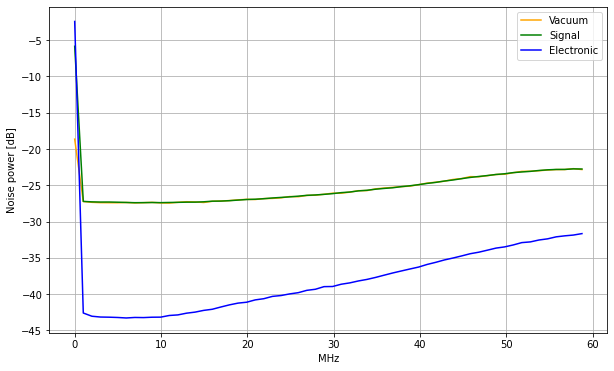

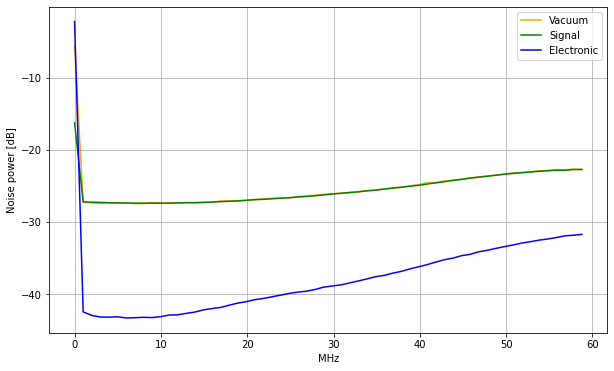

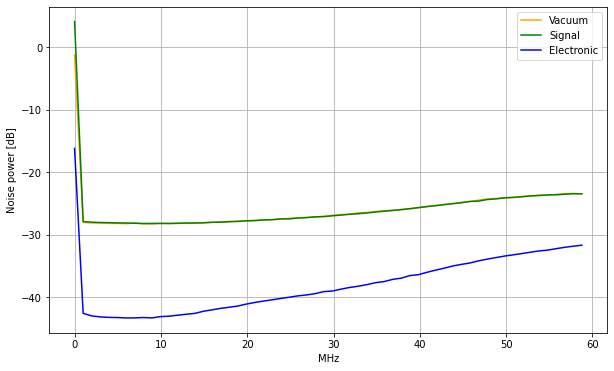

In [4]:
# Tomography information
tomography_phases = ['000', '030', '060', '090', '120', '150']
n_dim = 15 # Dimension for analysis

# Folder with data
'''
folder = "C:/Users/qpitlab/Desktop/Scissor QKD data/teleportation/"
date = "20240213/"
data = ''
extra = 'size0-phase0/'
path = folder + date + data + extra
homodyne, heralding, charlie, vacuum, meta = import_data(path)
'''
# Import multiple data
voltages = ['vac', '001', '002']
folder = "C:/Users/lunfa/Documents/PhD/Python/teleportation/files/teleportation/"
date = {'vac': '20240213/', '001': '20240213/', '002': '20240209/'}
extra = {'vac': 'size0-phase0/', '001': 'voltage001-phase090/', '002': 'voltage002-phase090/'}
path = {v: folder + date[v] + extra[v] for v in voltages}
data = {v: None for v in voltages}
homodyne = {v: None for v in voltages}
heralding = {v: None for v in voltages}
charlie = {v: None for v in voltages}
vacuum = {v: None for v in voltages}
files_for_each_phase = {v: None for v in voltages}
total_sequences = {v: None for v in voltages}
for v in voltages:
    data[v] = rawdata.rawdata(path[v], n_dim)
    homodyne[v] = data[v].homodyne
    charlie[v] = data[v].charlie
    vacuum[v] = data[v].vacuum
    sequences = data[voltages[0]].sequences
    points_per_seq = data[voltages[0]].points_per_seq
    files_for_each_phase[v] = data[v].files_for_each_phase
    total_sequences[v] = files_for_each_phase[v]*sequences
    print('%d files for each phase' %files_for_each_phase[v])
    print('%d sequences on each file with %d data points each' %(sequences, points_per_seq))
'''
# Time information
sequences = meta['subarray_count']
#files_for_each_phase = int(len(homodyne['000'])/sequences)
#total_sequences = files_for_each_phase*sequences
total_points = meta['wave_array_count']
points_per_seq = int(meta['wave_array_count']/sequences)
Ts = meta['horiz_interval']
begin = meta['horiz_offset']
x = np.linspace(begin, begin + Ts*total_points, total_points)
x_sequence = np.linspace(begin, begin + Ts*points_per_seq, points_per_seq)
#print('%d files for each phase' %files_for_each_phase)
#print('%d sequences on each file with %d data points each' %(sequences, points_per_seq))
'''

# Apply single mode function and analyse input state

VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


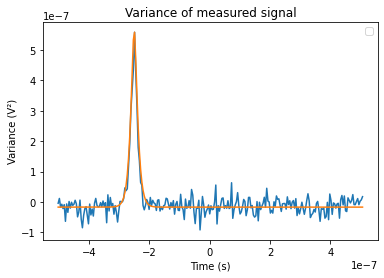

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


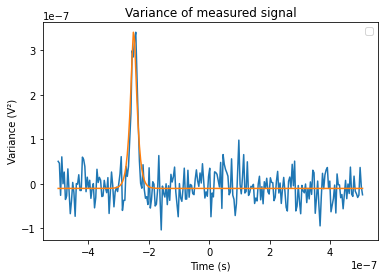

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12459561034977018
Block 1 Input |\alpha| = 0.08728945842394126
Block 2 Input |\alpha| = 0.07279673246767603
Block 3 Input |\alpha| = 0.16860820370545543
Block 4 Input |\alpha| = 0.045000865309918855
Block 5 Input |\alpha| = 0.12754755955589653
Block 6 Input |\alpha| = 0.10245029437672991
Block 7 Input |\alpha| = 0.13927873368607893
Block 8 Input |\alpha| = 0.16342703230259087
Block 9 Input |\alpha| = 0.12285609624709849
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 87.89 (17.64)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 87.89°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


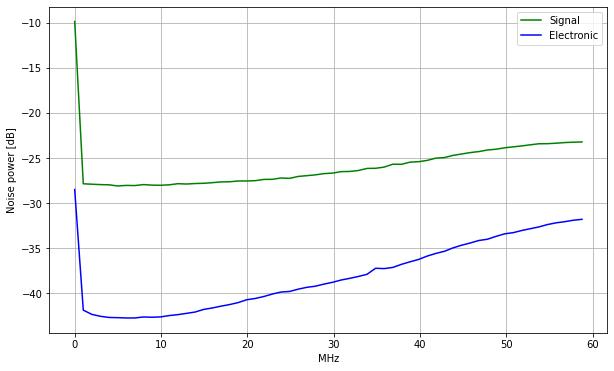

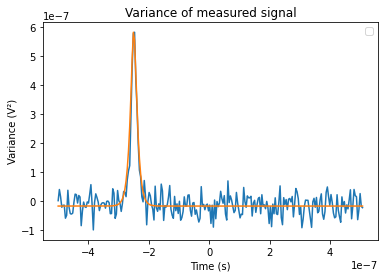

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.17933355489149824
Block 1 Input |\alpha| = 0.25495342755444955
Block 2 Input |\alpha| = 0.23504284067892464
Block 3 Input |\alpha| = 0.22242694760728812
Block 4 Input |\alpha| = 0.21529714645640805
Block 5 Input |\alpha| = 0.2026769620373596
Block 6 Input |\alpha| = 0.2019471160528192
Block 7 Input |\alpha| = 0.21892438061583927
Block 8 Input |\alpha| = 0.2911752641284881
Block 9 Input |\alpha| = 0.252670920007868
Input |\alpha| averaged through all blocks: 0.23 (0.03)
Input angle averaged through all blocks: 159.32 (6.97)°
Input |alpha| = 0.23
Relay theta = 90.00°
Input state theta = 159.32°
PLOTS FOR INPUT STATE
Success rate = 0.24 %
Success rate = 0.35 %
Success rate = 0.44 %
Success rate = 0.58 %
Success rate = 0.30 %
Success rate = 0.43 %
Success rate = 0.55 %
Success rate = 0.73 %
Success rate = 0.37 %


<ipython-input-36-3578b163b401>:63: ComplexWarning: Casting complex values to real discards the imaginary part
  rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v].input_rho, success_rate[v][i], n_dim, plot = False, verbose = False)


Converged
130 runs
|alpha| = 0.01
theta = -54.43°
Converged
161 runs
|alpha| = 0.01
theta = 83.90°
Converged
122 runs
|alpha| = 0.01
theta = -38.06°
Converged
104 runs
|alpha| = 0.08
theta = 32.76°
Converged
154 runs
|alpha| = 0.08
theta = 10.08°
Converged
99 runs
|alpha| = 0.09
theta = 10.29°
Converged
88 runs
|alpha| = 0.10
theta = 3.59°
Converged
109 runs
|alpha| = 0.06
theta = 71.61°
Converged
141 runs
|alpha| = 0.07
theta = 51.09°
Converged
110 runs
|alpha| = 0.07
theta = 55.38°
Converged
125 runs
|alpha| = 0.07
theta = 45.39°


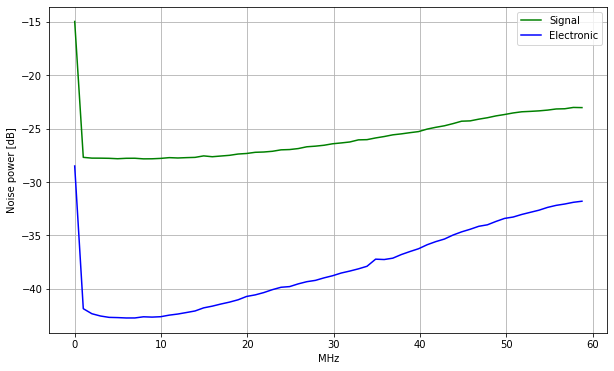

In [36]:
# Input state data
input_data_folder = "20240222/"#"input/"
#voltage_folder = '001/'#extra[extra.find('voltage') + len('voltage'): extra.find('-')]
input_extra = '1/'

input_folder = {'vac': path['vac'], '001': folder + date[v] + input_data_folder + '001/1/', '002': folder + date[v] + input_data_folder + '002/1'}

# Apply temporal mode function to a single data
#mf_homodyne, mf_vacuum, input_rho = apply_mode_function(homodyne, vacuum, input_folder = input_folder, input_plot = False)

# Apply temporal mode function to multilple data
mf_homodyne = {v: None for v in voltages}
mf_vacuum = {v: None for v in voltages}
input_rho = {v: None for v in voltages}
input_data = {v: None for v in voltages}

for v in voltages:
    mf_homodyne[v], mf_vacuum[v] = data[v].apply_mode_function(homodyne[v], vacuum[v])
    input_data[v] = inputstate.inputstate(input_folder[v], n_dim, data[v].mf, input_plot = False)

    
## Check coincidences    
    
    
# SSPD time delay information
sspd_time_delay = 100e-9
window = 2e-9
window_list = np.linspace(1e-9, 10e-9, 4)

# Obtain data and success rate for a single data and a single time window
#sig, success_rate = teleported_state_with_optimal_success_rate(homodyne, charlie, sspd_time_delay, window)
#sig, success_rate = select_teleported_data(homodyne, charlie, sspd_time_delay - 5e-9, window)

# Obtain data and success rate for a single data and multiple time windows
#vectorize_select = np.vectorize(select_teleported_data)
#sig, success_rate = vectorize_select(homodyne, charlie, sspd_time_delay - 5e-9, window_list)

# Obtain data and success rate for multiple data and multiple time windows
coincidence = {v: [coincidencecheck.selectdata(mf_homodyne[v], charlie[v], data[v].meta, w, verbose = False) for w in window_list] for v in voltages}
sig = {v: [None for w in window_list] for v in voltages}
success_rate = {v: [None for w in window_list] for v in voltages}
for v in voltages:
    for w in range(len(window_list)):
        sig[v][w], success_rate[v][w] = coincidence[v][w].select_teleported_data()
        
        
## Calculate output state


# Calculate output state for single data and multiple time delays
# runs = len(window_list)
# rho = np.zeros((runs, n_dim+1, n_dim+1), dtype = complex)
# fidelity = np.zeros(runs)
# for i in range(runs):
#     rho[i], fidelity[i] = calculate_output_state(sig[i], input_rho, success_rate[i], n_dim, plot = False, verbose = False)

# Calculate output state for multiple data and multiple time delays
runs = len(window_list)
rho = {v: np.zeros((runs, n_dim+1, n_dim+1), dtype = complex) for v in voltages}
fidelity = {v: np.zeros(runs) for v in voltages}
for v in voltages:
    for i in range(runs):
        rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v].input_rho, success_rate[v][i], n_dim, plot = False, verbose = False)

# Calculate fidelity with output state
#fidelity = quantumStateFidelity(rho, input_rho)
#print("Output fidelity is %f" %fidelity)
#print("Success rate is %f" %np.mean(success_rate))
#print("The product of these values is %f" %(fidelity*np.mean(success_rate)))
#print("Purity of output state is %.2f" %np.trace(rho@rho))

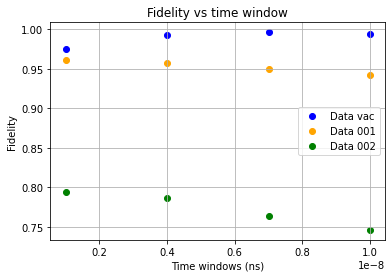

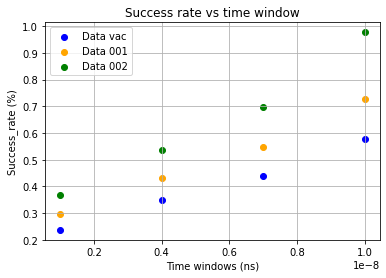

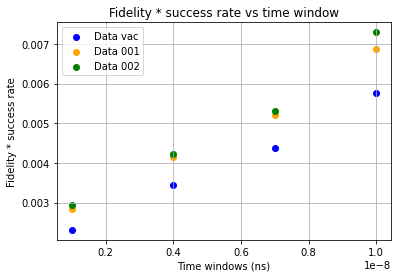

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


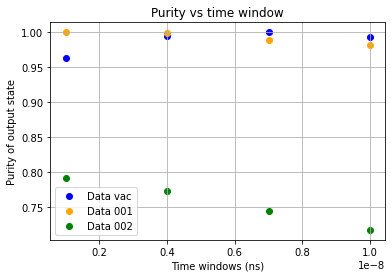

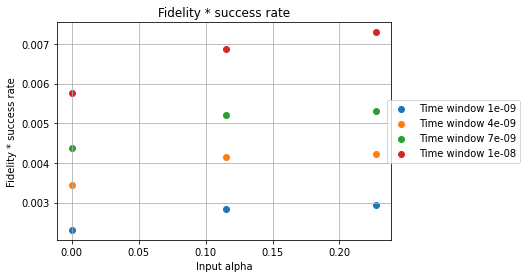

In [37]:
plot_time_window(rho, input_data, fidelity, success_rate, window_list, voltages)

# Comparison between results with/without Charlie click

VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


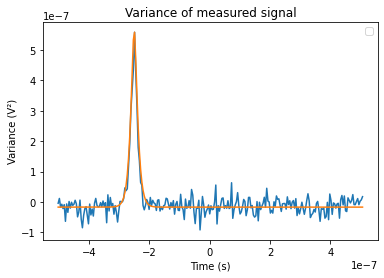

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


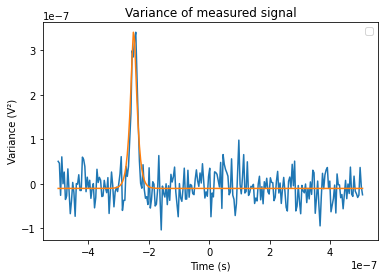

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12459561034977018
Block 1 Input |\alpha| = 0.08728945842394126
Block 2 Input |\alpha| = 0.07279673246767603
Block 3 Input |\alpha| = 0.16860820370545543
Block 4 Input |\alpha| = 0.045000865309918855
Block 5 Input |\alpha| = 0.12754755955589653
Block 6 Input |\alpha| = 0.10245029437672991
Block 7 Input |\alpha| = 0.13927873368607893
Block 8 Input |\alpha| = 0.16342703230259087
Block 9 Input |\alpha| = 0.12285609624709849
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 87.89 (17.64)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 87.89°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


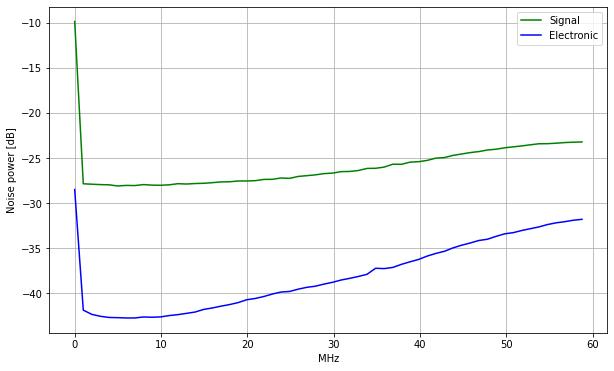

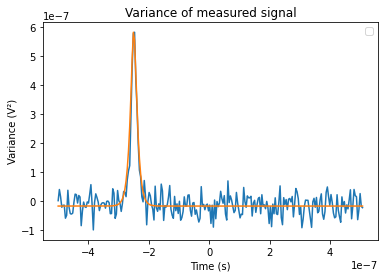

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.17933355489149824
Block 1 Input |\alpha| = 0.25495342755444955
Block 2 Input |\alpha| = 0.23504284067892464
Block 3 Input |\alpha| = 0.22242694760728812
Block 4 Input |\alpha| = 0.21529714645640805
Block 5 Input |\alpha| = 0.2026769620373596
Block 6 Input |\alpha| = 0.2019471160528192
Block 7 Input |\alpha| = 0.21892438061583927
Block 8 Input |\alpha| = 0.2911752641284881
Block 9 Input |\alpha| = 0.252670920007868
Input |\alpha| averaged through all blocks: 0.23 (0.03)
Input angle averaged through all blocks: 159.32 (6.97)°
Input |alpha| = 0.23
Relay theta = 90.00°
Input state theta = 159.32°
PLOTS FOR INPUT STATE
Success rate = 0.24 %
Success rate = 0.30 %
Success rate = 0.37 %
Converged
50 runs
|alpha| = 0.01
theta = 30.50°
Converged
104 runs
|alpha| = 0.08
theta = 32.76°
Converged
109 runs
|alpha| = 0.06
t

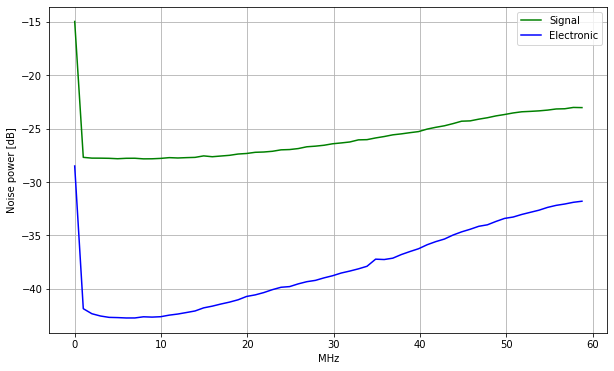

In [25]:
# Input state data
input_data_folder = "20240222/"#"input/"
#voltage_folder = '001/'#extra[extra.find('voltage') + len('voltage'): extra.find('-')]
input_extra = '1/'

input_folder = {'vac': path['vac'], '001': folder + date[v] + input_data_folder + '001/1/', '002': folder + date[v] + input_data_folder + '002/1'}

# Apply temporal mode function to a single data
#mf_homodyne, mf_vacuum, input_rho = apply_mode_function(homodyne, vacuum, input_folder = input_folder, input_plot = False)

# Apply temporal mode function to multilple data
mf_homodyne = {v: None for v in voltages}
mf_vacuum = {v: None for v in voltages}
input_rho = {v: None for v in voltages}
input_data = {v: None for v in voltages}

for v in voltages:
    mf_homodyne[v], mf_vacuum[v] = data[v].apply_mode_function(homodyne[v], vacuum[v])
    input_data[v] = inputstate.inputstate(input_folder[v], n_dim, data[v].mf, input_plot = False)

## Select data

# Find coincidences    
time_window = 2e-9
coincidence = {v: coincidencecheck.selectdata(mf_homodyne[v], charlie[v], data[v].meta, time_window, verbose = False) for v in voltages}
sig_click = {v: None for v in voltages}
success_rate_click = {v: None for v in voltages}
for v in voltages:
    sig_click[v], success_rate_click[v] = coincidence[v].select_teleported_data()
    
# Consider all click
sig_noclick = mf_homodyne
        
## Calculate output state

# Calculate output state for data with coincidence
rho_click = {v: np.zeros((n_dim+1, n_dim+1), dtype = complex) for v in voltages}
fidelity_click = {v: None for v in voltages}
for v in voltages:
    rho_click[v], fidelity_click[v] = functions.calculate_output_state(sig_click[v], input_data[v].input_rho, success_rate_click, n_dim, plot = False, verbose = False)

# Calculate output state considering all data
rho_noclick = {v: np.zeros((n_dim+1, n_dim+1), dtype = complex) for v in voltages}
fidelity_noclick = {v: None for v in voltages}
for v in voltages:
    rho_noclick[v], fidelity_noclick[v] = functions.calculate_output_state(sig_noclick[v], input_data[v].input_rho, 1, n_dim, plot = False, verbose = False)

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


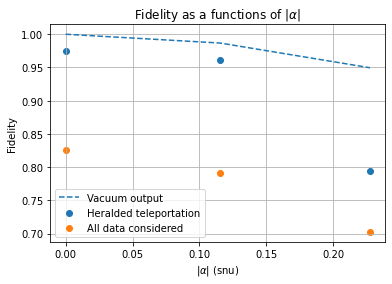

In [32]:
input_alpha = [np.abs(np.trace(functions.a_operator(n_dim)@input_data[v].input_rho)) for v in voltages]
fidelity_noclick_list = [fidelity_noclick[v] for v in voltages]
fidelity_click_list = [fidelity_click[v] for v in voltages]

rho_vac = np.zeros((n_dim+1, n_dim+1))
rho_vac[0][0] = 1

fid_vac = [functions.quantumStateFidelity(rho_vac, input_data[v].input_rho) for v in voltages]

plt.figure()
plt.scatter(input_alpha, fidelity_click_list, label = 'Heralded teleportation')
plt.scatter(input_alpha, fidelity_noclick_list, label = 'All data considered')
plt.plot(input_alpha, fid_vac, label = 'Vacuum output', linestyle = '--')
plt.grid()
plt.legend()
plt.title('Fidelity as a functions of $|\\alpha|$')
plt.ylabel('Fidelity')
plt.xlabel('$|\\alpha|$ (snu)')
plt.show()

# Vary mode function parameters

## Vary g

VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


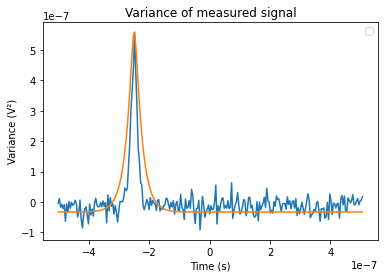

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


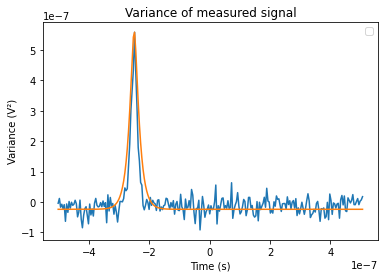

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


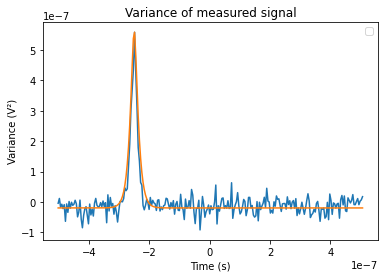

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


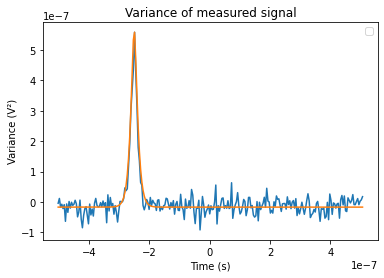

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


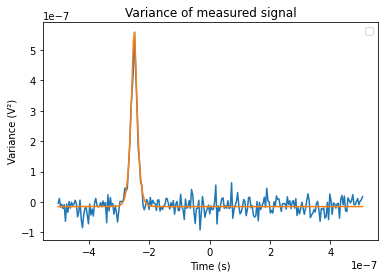

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


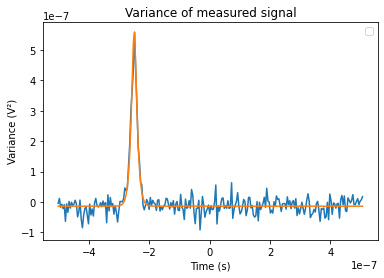

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


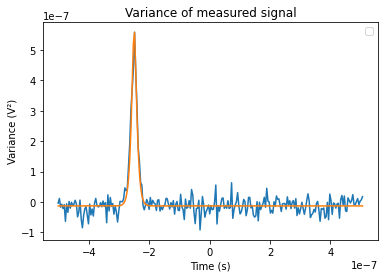

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


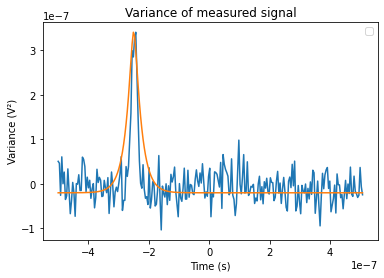

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.1961227916004212
Block 1 Input |\alpha| = 0.12027676392189364
Block 2 Input |\alpha| = 0.10692427010346293
Block 3 Input |\alpha| = 0.21968194931072374
Block 4 Input |\alpha| = 0.08632871929871937
Block 5 Input |\alpha| = 0.1675287137966006
Block 6 Input |\alpha| = 0.15706754992050587
Block 7 Input |\alpha| = 0.2100412055724898
Block 8 Input |\alpha| = 0.20063022836422595
Block 9 Input |\alpha| = 0.18290559546174784
Input |\alpha| averaged through all blocks: 0.16 (0.04)
Input angle averaged through all blocks: 87.05 (11.49)°
Input |alpha| = 0.16
Relay theta = 90.00°
Input state theta = 87.05°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


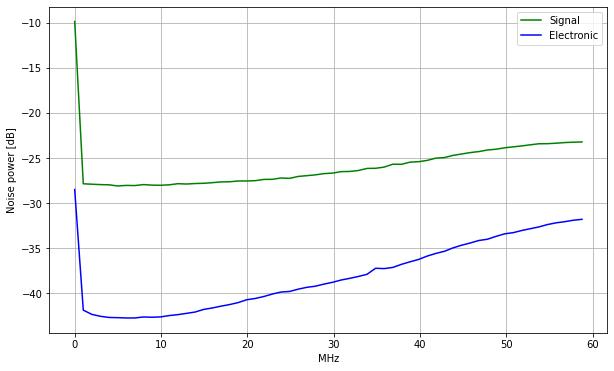

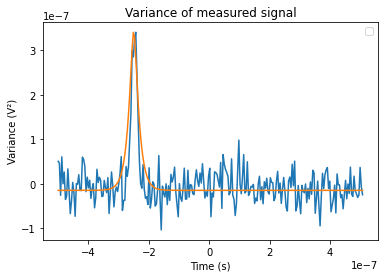

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.1599036169369662
Block 1 Input |\alpha| = 0.10001743533020702
Block 2 Input |\alpha| = 0.08796040134938621
Block 3 Input |\alpha| = 0.19596467944617854
Block 4 Input |\alpha| = 0.06534640837143246
Block 5 Input |\alpha| = 0.14679317081554583
Block 6 Input |\alpha| = 0.13144335097469115
Block 7 Input |\alpha| = 0.17760252116739825
Block 8 Input |\alpha| = 0.1821822468055591
Block 9 Input |\alpha| = 0.15444607858313922
Input |\alpha| averaged through all blocks: 0.14 (0.04)
Input angle averaged through all blocks: 87.68 (13.84)°
Input |alpha| = 0.14
Relay theta = 90.00°
Input state theta = 87.68°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


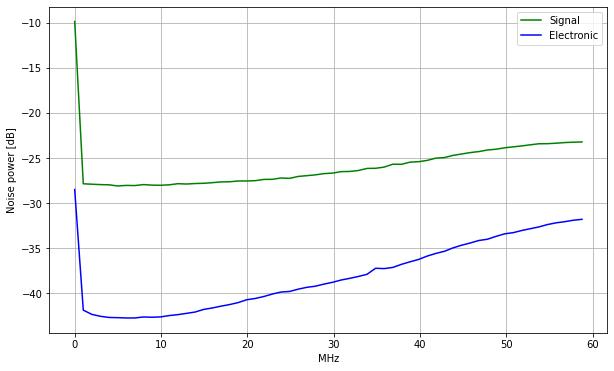

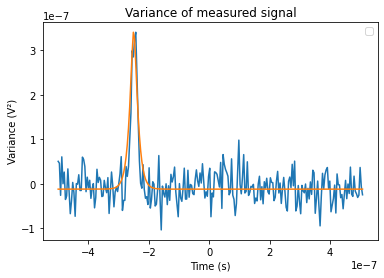

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.13866285525186847
Block 1 Input |\alpha| = 0.09150843229051822
Block 2 Input |\alpha| = 0.07838350954678674
Block 3 Input |\alpha| = 0.1800936008522055
Block 4 Input |\alpha| = 0.053041349534809
Block 5 Input |\alpha| = 0.13495678546111578
Block 6 Input |\alpha| = 0.1142744482477034
Block 7 Input |\alpha| = 0.15540590456496947
Block 8 Input |\alpha| = 0.17117277000849462
Block 9 Input |\alpha| = 0.13605454534745268
Input |\alpha| averaged through all blocks: 0.13 (0.04)
Input angle averaged through all blocks: 87.92 (15.87)°
Input |alpha| = 0.13
Relay theta = 90.00°
Input state theta = 87.92°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


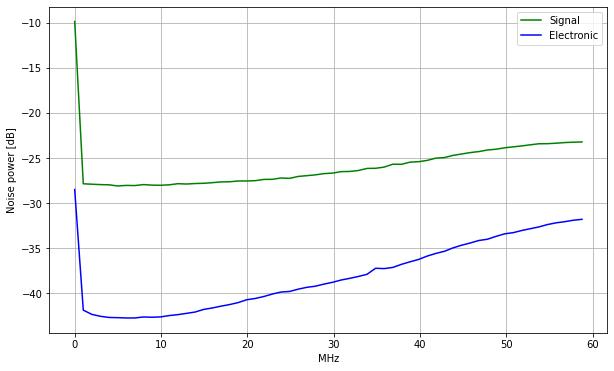

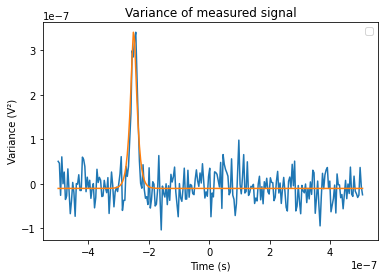

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12459561034977018
Block 1 Input |\alpha| = 0.08728945842394126
Block 2 Input |\alpha| = 0.07279673246767603
Block 3 Input |\alpha| = 0.16860820370545543
Block 4 Input |\alpha| = 0.045000865309918855
Block 5 Input |\alpha| = 0.12754755955589653
Block 6 Input |\alpha| = 0.10245029437672991
Block 7 Input |\alpha| = 0.13927873368607893
Block 8 Input |\alpha| = 0.16342703230259087
Block 9 Input |\alpha| = 0.12285609624709849
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 87.89 (17.64)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 87.89°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


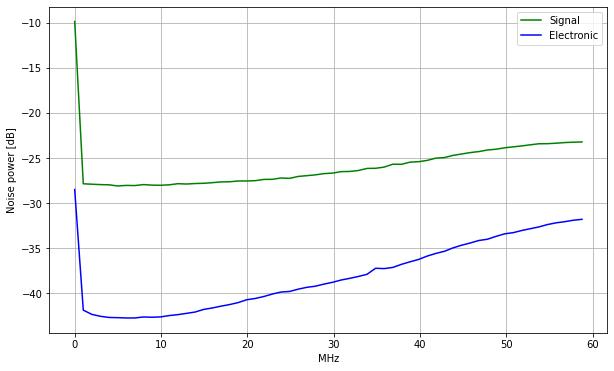

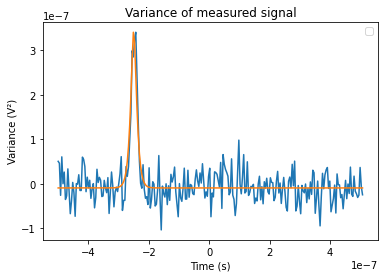

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.11441424087681895
Block 1 Input |\alpha| = 0.08485369795265904
Block 2 Input |\alpha| = 0.06913002375409569
Block 3 Input |\alpha| = 0.15987524812873544
Block 4 Input |\alpha| = 0.039462114239348985
Block 5 Input |\alpha| = 0.12261855681436587
Block 6 Input |\alpha| = 0.09408786301268048
Block 7 Input |\alpha| = 0.1271072633280666
Block 8 Input |\alpha| = 0.15744353517837772
Block 9 Input |\alpha| = 0.11283889293338942
Input |\alpha| averaged through all blocks: 0.11 (0.04)
Input angle averaged through all blocks: 87.68 (19.20)°
Input |alpha| = 0.11
Relay theta = 90.00°
Input state theta = 87.68°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


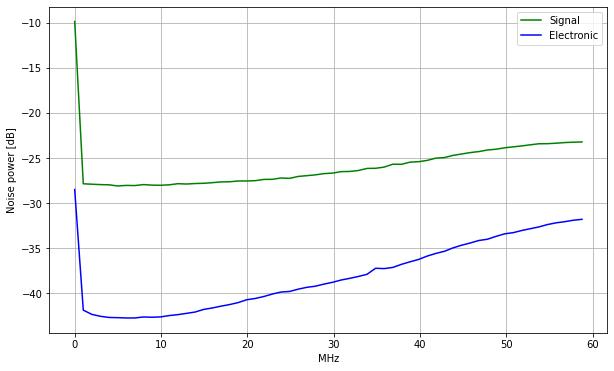

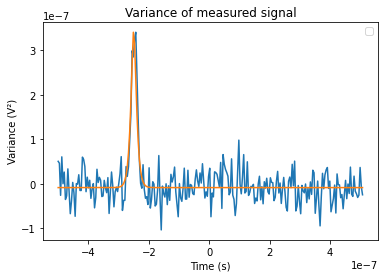

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.10657788080581213
Block 1 Input |\alpha| = 0.08324718996284798
Block 2 Input |\alpha| = 0.06651676891467893
Block 3 Input |\alpha| = 0.1529976337893446
Block 4 Input |\alpha| = 0.0355588026917264
Block 5 Input |\alpha| = 0.11917531577264544
Block 6 Input |\alpha| = 0.08802633419397966
Block 7 Input |\alpha| = 0.11766296265022809
Block 8 Input |\alpha| = 0.1525722682576692
Block 9 Input |\alpha| = 0.1050003271312571
Input |\alpha| averaged through all blocks: 0.10 (0.03)
Input angle averaged through all blocks: 87.36 (20.61)°
Input |alpha| = 0.10
Relay theta = 90.00°
Input state theta = 87.36°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


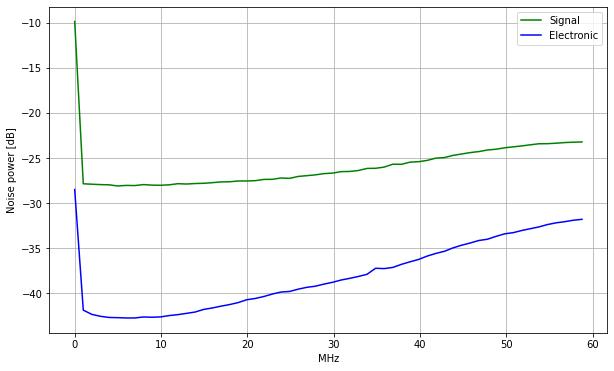

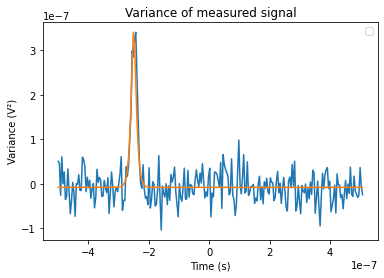

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.10029576070604554
Block 1 Input |\alpha| = 0.0820707298019478
Block 2 Input |\alpha| = 0.06455602537638779
Block 3 Input |\alpha| = 0.14743944927208516
Block 4 Input |\alpha| = 0.03279335612794605
Block 5 Input |\alpha| = 0.11666420991013875
Block 6 Input |\alpha| = 0.08353778152025536
Block 7 Input |\alpha| = 0.1101746066968658
Block 8 Input |\alpha| = 0.14848613655486867
Block 9 Input |\alpha| = 0.09875071944640083
Input |\alpha| averaged through all blocks: 0.10 (0.03)
Input angle averaged through all blocks: 86.96 (21.89)°
Input |alpha| = 0.10
Relay theta = 90.00°
Input state theta = 86.96°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


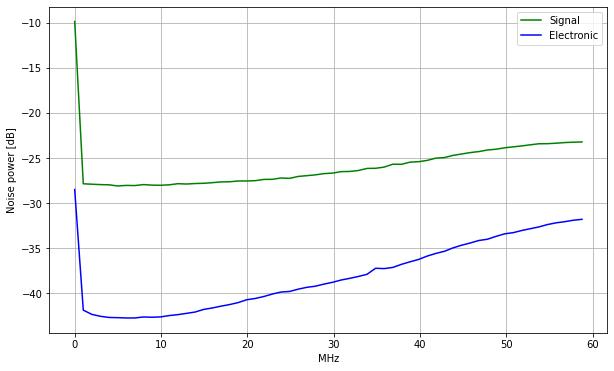

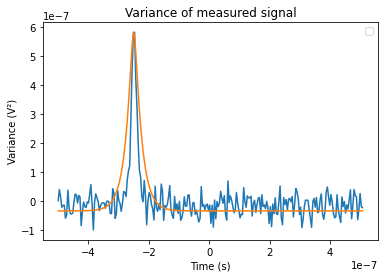

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.27971257824728035
Block 1 Input |\alpha| = 0.3510680826842203
Block 2 Input |\alpha| = 0.33434167748357463
Block 3 Input |\alpha| = 0.3297860800615546
Block 4 Input |\alpha| = 0.31801987451423624
Block 5 Input |\alpha| = 0.33750305911988027
Block 6 Input |\alpha| = 0.307330724288542
Block 7 Input |\alpha| = 0.31784104819623155
Block 8 Input |\alpha| = 0.38619809999649973
Block 9 Input |\alpha| = 0.35075706384515004
Input |\alpha| averaged through all blocks: 0.33 (0.03)
Input angle averaged through all blocks: 158.45 (5.64)°
Input |alpha| = 0.33
Relay theta = 90.00°
Input state theta = 158.45°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


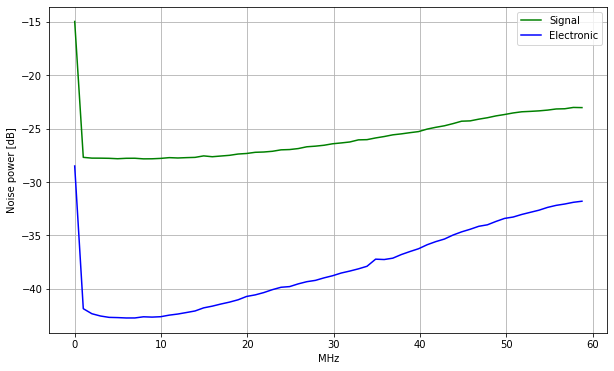

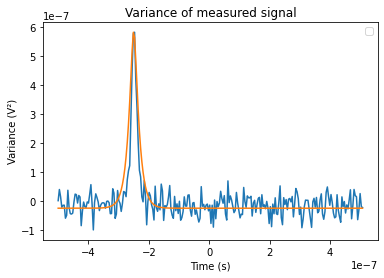

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.22949373380510085
Block 1 Input |\alpha| = 0.30550835303255364
Block 2 Input |\alpha| = 0.28605475182415463
Block 3 Input |\alpha| = 0.27654133754946114
Block 4 Input |\alpha| = 0.2628630523631864
Block 5 Input |\alpha| = 0.2719372450821897
Block 6 Input |\alpha| = 0.25628909272820377
Block 7 Input |\alpha| = 0.26629601098394035
Block 8 Input |\alpha| = 0.33961355882120886
Block 9 Input |\alpha| = 0.30492410188426955
Input |\alpha| averaged through all blocks: 0.28 (0.03)
Input angle averaged through all blocks: 158.87 (6.10)°
Input |alpha| = 0.28
Relay theta = 90.00°
Input state theta = 158.87°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


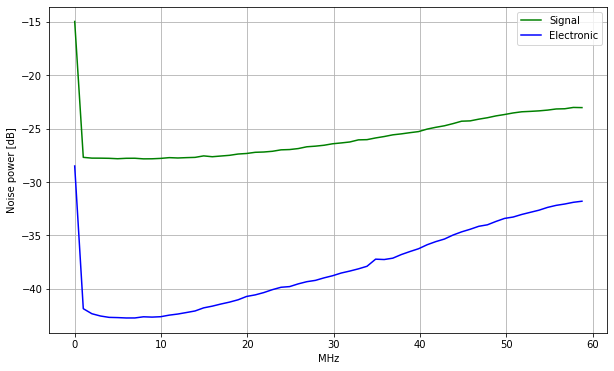

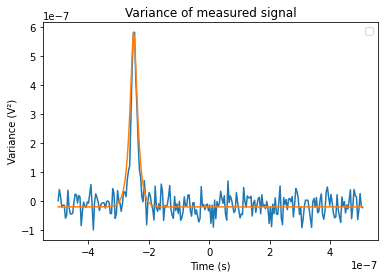

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.19953518113098379
Block 1 Input |\alpha| = 0.27576722993088904
Block 2 Input |\alpha| = 0.25614472828192053
Block 3 Input |\alpha| = 0.24426546347537328
Block 4 Input |\alpha| = 0.23318056054635744
Block 5 Input |\alpha| = 0.23084743783680473
Block 6 Input |\alpha| = 0.22414905084626663
Block 7 Input |\alpha| = 0.23744323453907887
Block 8 Input |\alpha| = 0.31120879484696906
Block 9 Input |\alpha| = 0.2747103857576866
Input |\alpha| averaged through all blocks: 0.25 (0.03)
Input angle averaged through all blocks: 159.13 (6.53)°
Input |alpha| = 0.25
Relay theta = 90.00°
Input state theta = 159.13°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


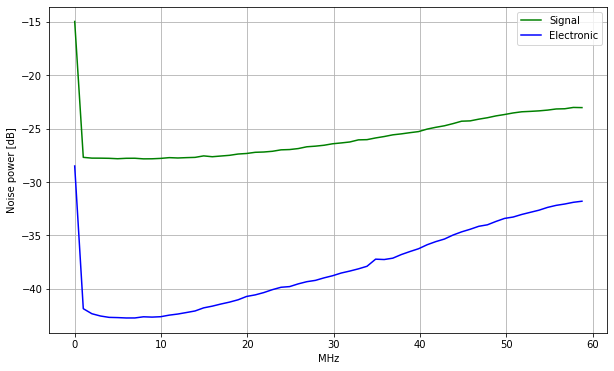

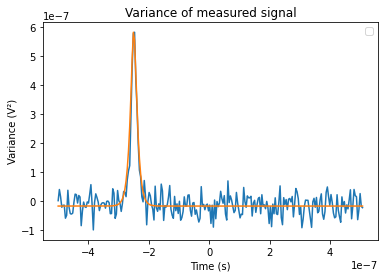

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.17933355489149824
Block 1 Input |\alpha| = 0.25495342755444955
Block 2 Input |\alpha| = 0.23504284067892464
Block 3 Input |\alpha| = 0.22242694760728812
Block 4 Input |\alpha| = 0.21529714645640805
Block 5 Input |\alpha| = 0.2026769620373596
Block 6 Input |\alpha| = 0.2019471160528192
Block 7 Input |\alpha| = 0.21892438061583927
Block 8 Input |\alpha| = 0.2911752641284881
Block 9 Input |\alpha| = 0.252670920007868
Input |\alpha| averaged through all blocks: 0.23 (0.03)
Input angle averaged through all blocks: 159.32 (6.97)°
Input |alpha| = 0.23
Relay theta = 90.00°
Input state theta = 159.32°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


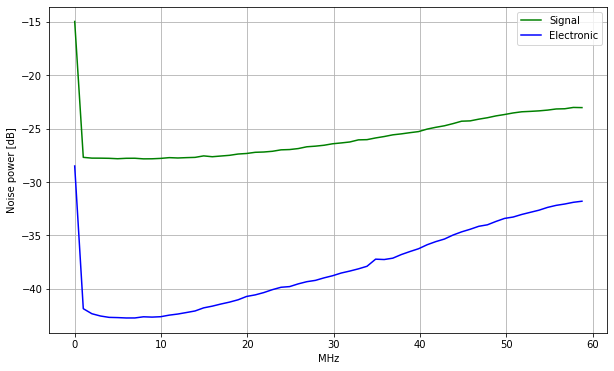

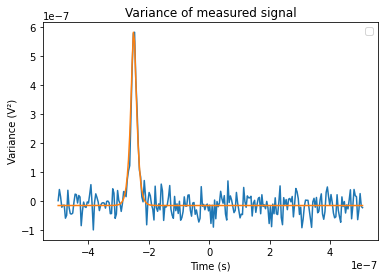

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.1647455325426295
Block 1 Input |\alpha| = 0.23981852927355793
Block 2 Input |\alpha| = 0.21894690055642893
Block 3 Input |\alpha| = 0.206518189721247
Block 4 Input |\alpha| = 0.20363311187708483
Block 5 Input |\alpha| = 0.1822983320849117
Block 6 Input |\alpha| = 0.18572640444547844
Block 7 Input |\alpha| = 0.20585727566453216
Block 8 Input |\alpha| = 0.2758813655699393
Block 9 Input |\alpha| = 0.23576295166992592
Input |\alpha| averaged through all blocks: 0.21 (0.03)
Input angle averaged through all blocks: 159.48 (7.42)°
Input |alpha| = 0.21
Relay theta = 90.00°
Input state theta = 159.48°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


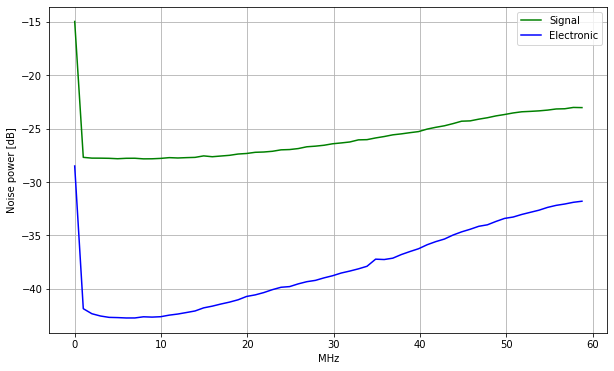

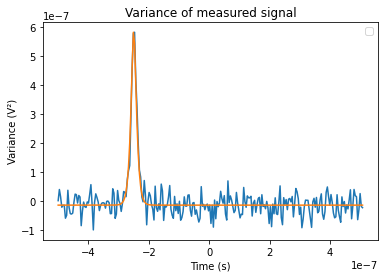

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.15373775839398468
Block 1 Input |\alpha| = 0.22850073901815784
Block 2 Input |\alpha| = 0.20605095268690735
Block 3 Input |\alpha| = 0.19429908855403763
Block 4 Input |\alpha| = 0.19555899613040156
Block 5 Input |\alpha| = 0.16703320776956254
Block 6 Input |\alpha| = 0.17341969920234235
Block 7 Input |\alpha| = 0.19599083106050685
Block 8 Input |\alpha| = 0.2636697425233695
Block 9 Input |\alpha| = 0.2223807279180815
Input |\alpha| averaged through all blocks: 0.20 (0.03)
Input angle averaged through all blocks: 159.65 (7.87)°
Input |alpha| = 0.20
Relay theta = 90.00°
Input state theta = 159.65°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


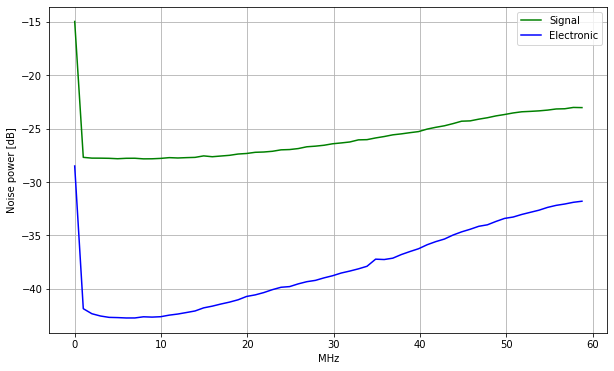

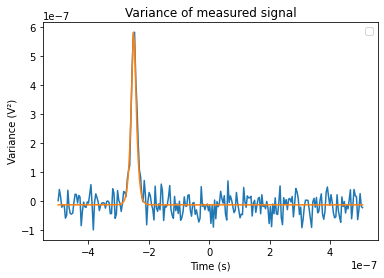

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.1451680641263993
Block 1 Input |\alpha| = 0.21983725284657055
Block 2 Input |\alpha| = 0.19538811400765693
Block 3 Input |\alpha| = 0.18454317015420063
Block 4 Input |\alpha| = 0.1896973495674214
Block 5 Input |\alpha| = 0.15530964623871713
Block 6 Input |\alpha| = 0.1638168473687927
Block 7 Input |\alpha| = 0.1881722508905268
Block 8 Input |\alpha| = 0.25365023221899025
Block 9 Input |\alpha| = 0.21155218703842374
Input |\alpha| averaged through all blocks: 0.19 (0.03)
Input angle averaged through all blocks: 159.82 (8.31)°
Input |alpha| = 0.19
Relay theta = 90.00°
Input state theta = 159.82°
PLOTS FOR INPUT STATE
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.30 %
Success rate = 0.30 %

<ipython-input-5-d010cce42ded>:52: ComplexWarning: Casting complex values to real discards the imaginary part
  rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v][i].input_rho, success_rate[v], n_dim, plot = False, verbose = False)


Converged
50 runs
|alpha| = 0.02
theta = -8.31°
Converged
48 runs
|alpha| = 0.01
theta = 9.61°
Converged
50 runs
|alpha| = 0.01
theta = 30.50°
Converged
57 runs
|alpha| = 0.02
theta = 40.24°
Converged
59 runs
|alpha| = 0.01
theta = 61.04°
Converged
66 runs
|alpha| = 0.02
theta = 62.91°
Converged
90 runs
|alpha| = 0.09
theta = 27.88°
Converged
106 runs
|alpha| = 0.09
theta = 28.35°
Converged
107 runs
|alpha| = 0.08
theta = 30.16°
Converged
104 runs
|alpha| = 0.08
theta = 32.76°
Converged
100 runs
|alpha| = 0.08
theta = 35.54°
Converged
98 runs
|alpha| = 0.08
theta = 38.24°
Converged
97 runs
|alpha| = 0.08
theta = 40.39°
Converged
118 runs
|alpha| = 0.08
theta = 84.10°
Converged
113 runs
|alpha| = 0.07
theta = 76.93°
Converged
122 runs
|alpha| = 0.07
theta = 73.35°
Converged
109 runs
|alpha| = 0.06
theta = 71.61°
Converged
96 runs
|alpha| = 0.06
theta = 62.87°
Converged
92 runs
|alpha| = 0.06
theta = 60.90°
Converged
88 runs
|alpha| = 0.05
theta = 57.48°


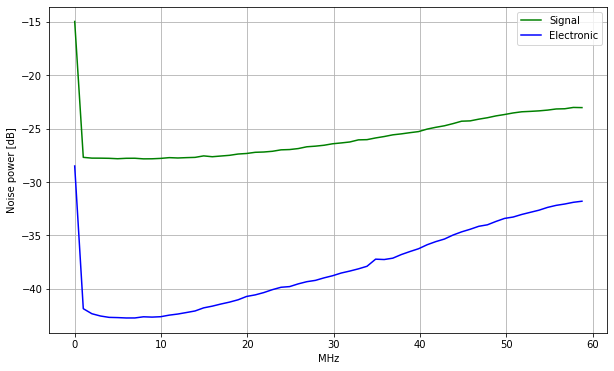

In [5]:
# Input state data
input_data_folder = "20240222/"#"input/"
#voltage_folder = '001/'#extra[extra.find('voltage') + len('voltage'): extra.find('-')]
input_extra = '1/'

input_folder = {'vac': path['vac'], '001': folder + date[v] + input_data_folder + '001/1/', '002': folder + date[v] + input_data_folder + '002/1'}

# Apply temporal mode function to a single data
#mf_homodyne, mf_vacuum, input_rho = apply_mode_function(homodyne, vacuum, input_folder = input_folder, input_plot = False)

# Mode function parameter to vary
g_med = 2*np.pi*17e6
window = 2*np.pi*10e6
points = 7
g_list = np.linspace(g_med - window, g_med + window, points)

# Apply temporal mode function to multilple data
mf_homodyne = {v: [] for v in voltages}
mf_vacuum = {v: [] for v in voltages}
input_rho = {v: [] for v in voltages}
input_data = {v: [] for v in voltages}

for v in voltages:
    for j, g in enumerate(g_list):
        homo, vac = data[v].apply_mode_function(homodyne[v], vacuum[v], homodyne_g=g)
        mf_homodyne[v].append(homo)
        mf_vacuum[v].append(vac)
        
        input_data[v].append(inputstate.inputstate(input_folder[v], n_dim, data[v].mf, input_plot = False))

        
## Coincidences
        
# SSPD time delay information
sspd_time_delay = 100e-9
window = 2e-9

# Obtain data and success rate for multiple data and varying mode function parameter
coincidence = {v: [coincidencecheck.selectdata(mf_homodyne[v][g], charlie[v], data[v].meta, window, verbose = False) for g in range(len(g_list))] for v in voltages}
sig = {v: [None for g in range(len(g_list))] for v in voltages}
success_rate = {v: [None for g in range(len(g_list))] for v in voltages}
for v in voltages:
    for g in range(len(g_list)):
        sig[v][g], success_rate[v] = coincidence[v][g].select_teleported_data()
          
# Calculate output state for multiple data and multiple time delays
runs = len(g_list)
rho = {v: np.zeros((runs, n_dim+1, n_dim+1), dtype = complex) for v in voltages}
fidelity = {v: np.zeros(runs) for v in voltages}
for v in voltages:
    for i in range(runs):
        rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v][i].input_rho, success_rate[v], n_dim, plot = False, verbose = False)

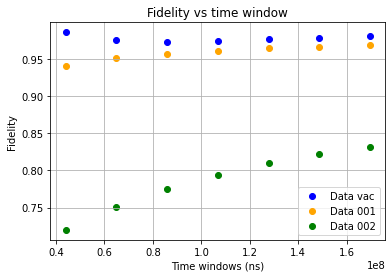

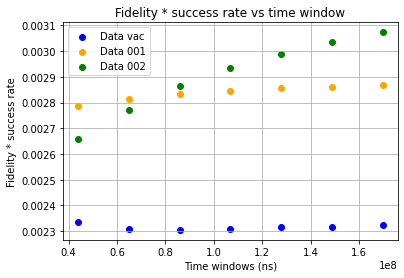

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


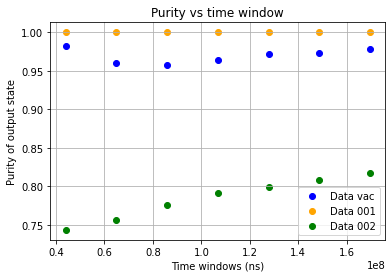

In [6]:
plot_mf_parameters(rho, input_data, fidelity, success_rate, g_list, voltages)

## Vary k 

VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


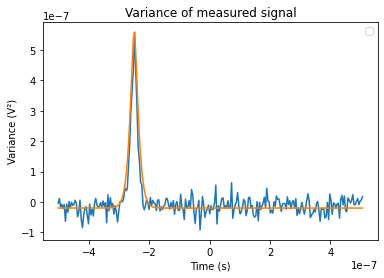

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


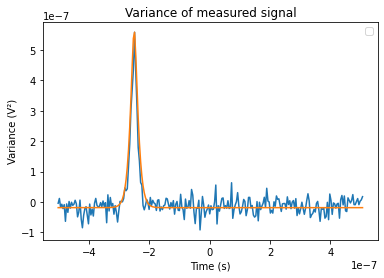

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


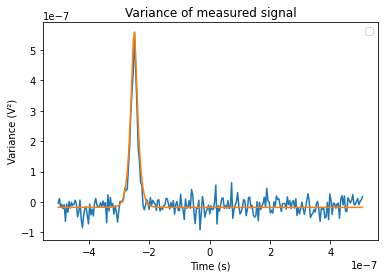

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


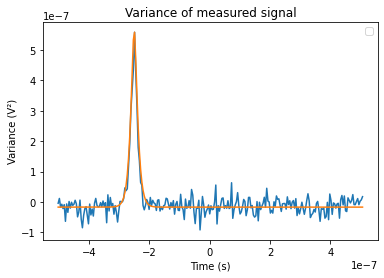

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


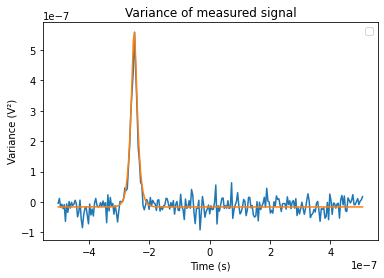

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


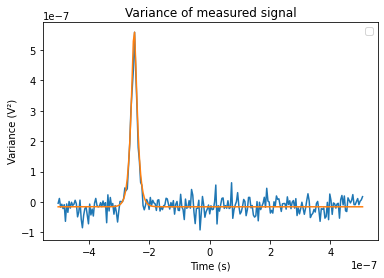

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


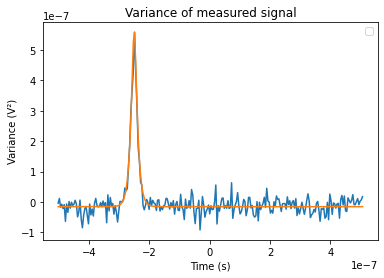

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


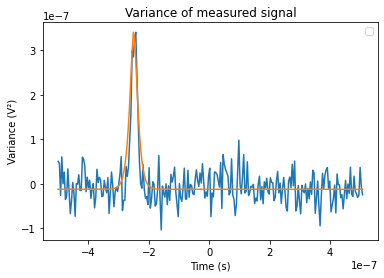

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.1388909826216172
Block 1 Input |\alpha| = 0.09038332590546141
Block 2 Input |\alpha| = 0.07800890079919494
Block 3 Input |\alpha| = 0.18015213474036904
Block 4 Input |\alpha| = 0.05325457853273658
Block 5 Input |\alpha| = 0.13394827290289085
Block 6 Input |\alpha| = 0.11434127902343036
Block 7 Input |\alpha| = 0.15638707068218768
Block 8 Input |\alpha| = 0.17099723847442627
Block 9 Input |\alpha| = 0.1374359713955385
Input |\alpha| averaged through all blocks: 0.13 (0.04)
Input angle averaged through all blocks: 88.04 (15.73)°
Input |alpha| = 0.13
Relay theta = 90.00°
Input state theta = 88.04°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


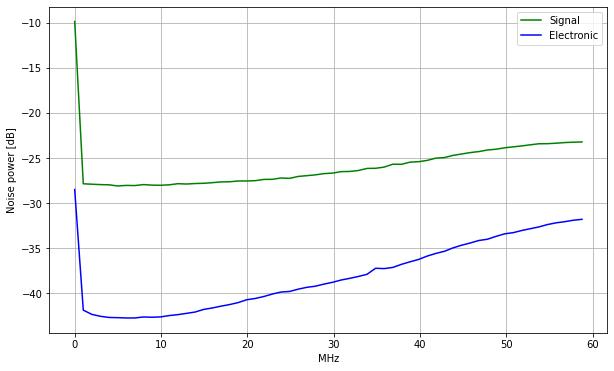

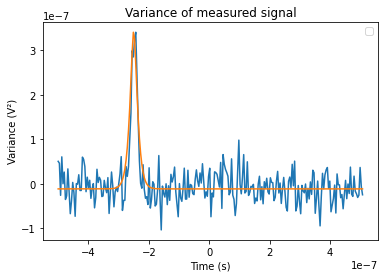

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.1329207694457252
Block 1 Input |\alpha| = 0.08890893104373261
Block 2 Input |\alpha| = 0.07571098519461318
Block 3 Input |\alpha| = 0.17536848921513704
Block 4 Input |\alpha| = 0.04969432653651958
Block 5 Input |\alpha| = 0.131042276858445
Block 6 Input |\alpha| = 0.10919436269643981
Block 7 Input |\alpha| = 0.14927516805885135
Block 8 Input |\alpha| = 0.16790983402348292
Block 9 Input |\alpha| = 0.13144412745485476
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 88.03 (16.48)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 88.03°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


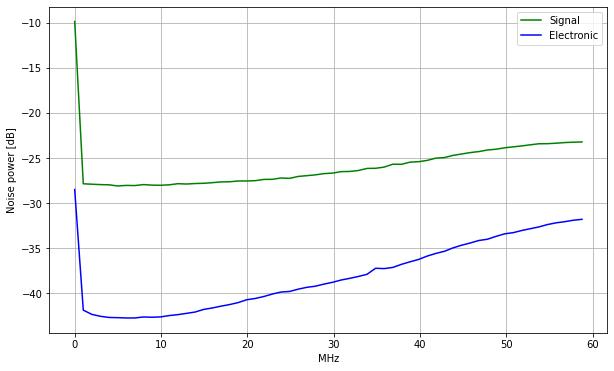

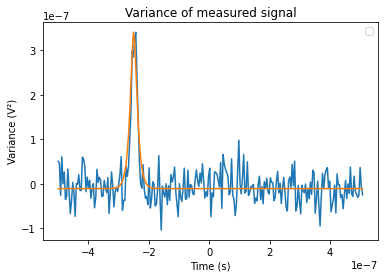

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12830074070818823
Block 1 Input |\alpha| = 0.08795260442562321
Block 2 Input |\alpha| = 0.07404823112887886
Block 3 Input |\alpha| = 0.1716196285611027
Block 4 Input |\alpha| = 0.04703303421070989
Block 5 Input |\alpha| = 0.12901137695665443
Block 6 Input |\alpha| = 0.10536199613451491
Block 7 Input |\alpha| = 0.14371527625220978
Block 8 Input |\alpha| = 0.1654503370540633
Block 9 Input |\alpha| = 0.12669284994763444
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 87.97 (17.10)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 87.97°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


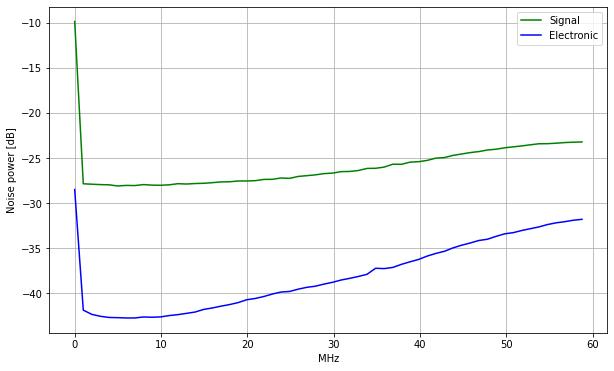

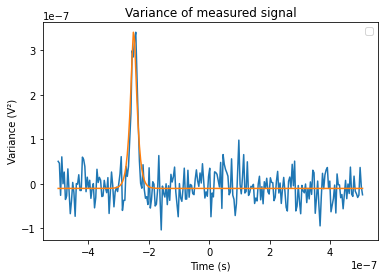

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12459561034977018
Block 1 Input |\alpha| = 0.08728945842394126
Block 2 Input |\alpha| = 0.07279673246767603
Block 3 Input |\alpha| = 0.16860820370545543
Block 4 Input |\alpha| = 0.045000865309918855
Block 5 Input |\alpha| = 0.12754755955589653
Block 6 Input |\alpha| = 0.10245029437672991
Block 7 Input |\alpha| = 0.13927873368607893
Block 8 Input |\alpha| = 0.16342703230259087
Block 9 Input |\alpha| = 0.12285609624709849
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 87.89 (17.64)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 87.89°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


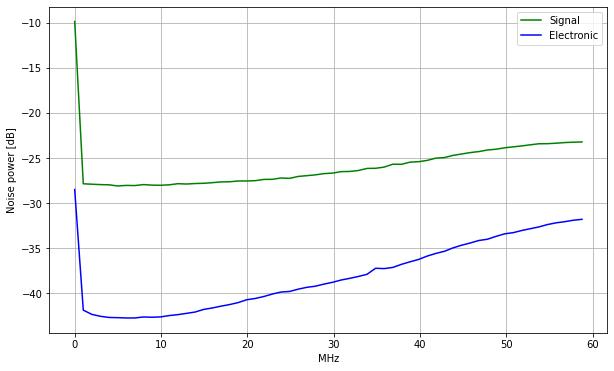

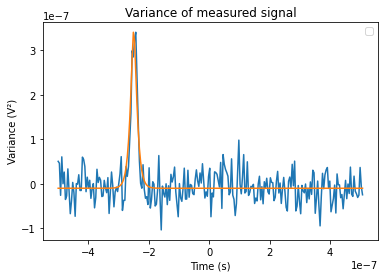

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12154810908112683
Block 1 Input |\alpha| = 0.08680421155768485
Block 2 Input |\alpha| = 0.07182947413359005
Block 3 Input |\alpha| = 0.1661415389932516
Block 4 Input |\alpha| = 0.04342474892229373
Block 5 Input |\alpha| = 0.12646229660772842
Block 6 Input |\alpha| = 0.10020040298115235
Block 7 Input |\alpha| = 0.13567824351066693
Block 8 Input |\alpha| = 0.16172569770642617
Block 9 Input |\alpha| = 0.11971459800824016
Input |\alpha| averaged through all blocks: 0.11 (0.04)
Input angle averaged through all blocks: 87.80 (18.10)°
Input |alpha| = 0.11
Relay theta = 90.00°
Input state theta = 87.80°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


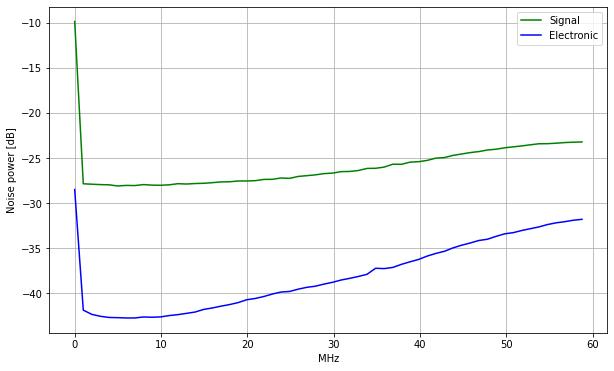

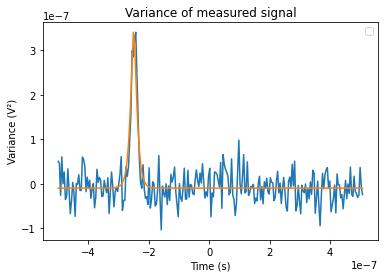

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.11899544923942201
Block 1 Input |\alpha| = 0.08643389065972183
Block 2 Input |\alpha| = 0.0710678977010843
Block 3 Input |\alpha| = 0.16408869190954883
Block 4 Input |\alpha| = 0.042187766331022496
Block 5 Input |\alpha| = 0.1256361423441248
Block 6 Input |\alpha| = 0.09843694355991535
Block 7 Input |\alpha| = 0.13271421344831016
Block 8 Input |\alpha| = 0.16027262660629735
Block 9 Input |\alpha| = 0.11711262253055389
Input |\alpha| averaged through all blocks: 0.11 (0.04)
Input angle averaged through all blocks: 87.70 (18.50)°
Input |alpha| = 0.11
Relay theta = 90.00°
Input state theta = 87.70°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


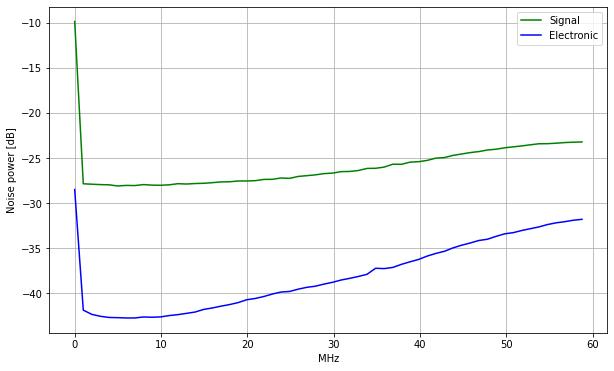

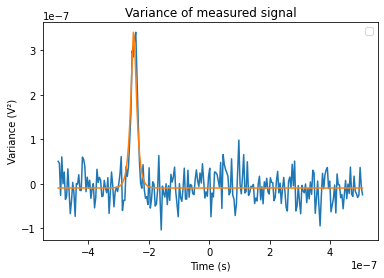

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.11682822498421731
Block 1 Input |\alpha| = 0.0861420250228599
Block 2 Input |\alpha| = 0.07045989605663976
Block 3 Input |\alpha| = 0.1623572771990569
Block 4 Input |\alpha| = 0.041207873753297514
Block 5 Input |\alpha| = 0.12499131232727018
Block 6 Input |\alpha| = 0.09703774126487354
Block 7 Input |\alpha| = 0.13024395548073403
Block 8 Input |\alpha| = 0.15901712811726493
Block 9 Input |\alpha| = 0.11493567956066014
Input |\alpha| averaged through all blocks: 0.11 (0.04)
Input angle averaged through all blocks: 87.60 (18.86)°
Input |alpha| = 0.11
Relay theta = 90.00°
Input state theta = 87.60°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


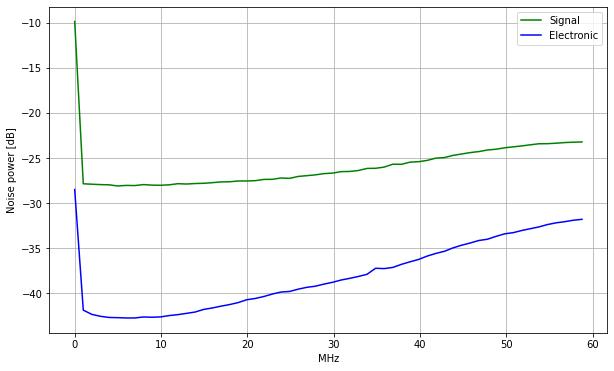

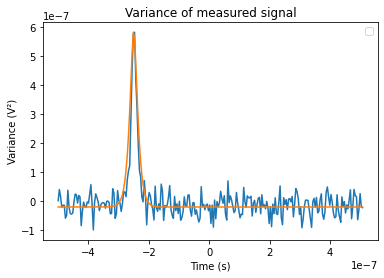

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.20001639390115433
Block 1 Input |\alpha| = 0.275339168230207
Block 2 Input |\alpha| = 0.25692721934827484
Block 3 Input |\alpha| = 0.2445951214180229
Block 4 Input |\alpha| = 0.2312701122200538
Block 5 Input |\alpha| = 0.23182304524392042
Block 6 Input |\alpha| = 0.22502501947579742
Block 7 Input |\alpha| = 0.23672216653956854
Block 8 Input |\alpha| = 0.31152628139532174
Block 9 Input |\alpha| = 0.2758258506133911
Input |\alpha| averaged through all blocks: 0.25 (0.03)
Input angle averaged through all blocks: 159.11 (6.54)°
Input |alpha| = 0.25
Relay theta = 90.00°
Input state theta = 159.11°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


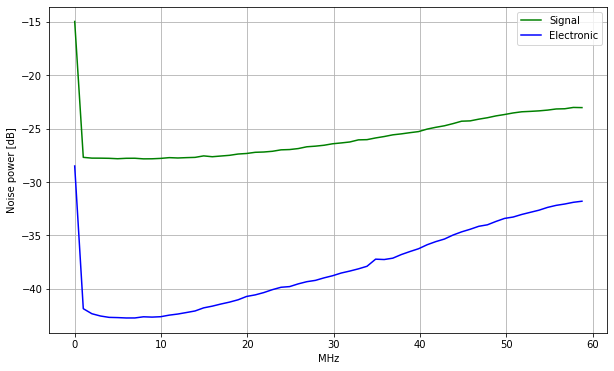

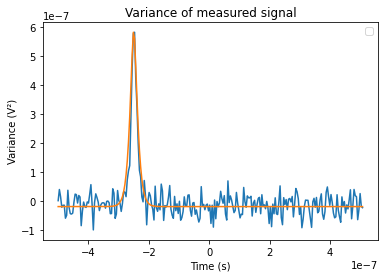

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.19127579129727498
Block 1 Input |\alpha| = 0.26658059127203365
Block 2 Input |\alpha| = 0.24797153655589108
Block 3 Input |\alpha| = 0.23528215524183438
Block 4 Input |\alpha| = 0.22407103609620027
Block 5 Input |\alpha| = 0.21946710359169122
Block 6 Input |\alpha| = 0.2152985679792296
Block 7 Input |\alpha| = 0.22916639192627705
Block 8 Input |\alpha| = 0.3031496941283421
Block 9 Input |\alpha| = 0.26629933061732874
Input |\alpha| averaged through all blocks: 0.24 (0.03)
Input angle averaged through all blocks: 159.19 (6.70)°
Input |alpha| = 0.24
Relay theta = 90.00°
Input state theta = 159.19°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


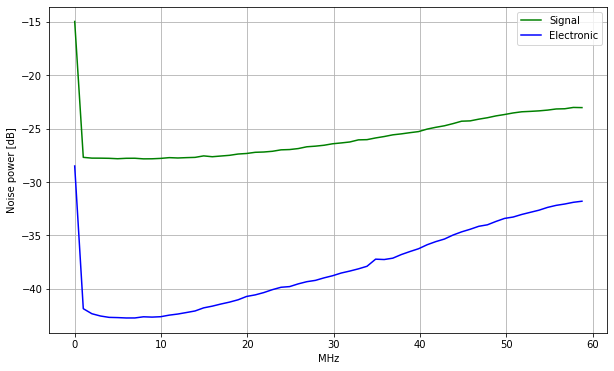

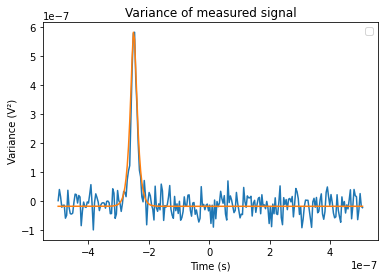

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.1845907247538421
Block 1 Input |\alpha| = 0.26000252511312777
Block 2 Input |\alpha| = 0.24086256650336257
Block 3 Input |\alpha| = 0.228119259186004
Block 4 Input |\alpha| = 0.21900044591294773
Block 5 Input |\alpha| = 0.21003862662518882
Block 6 Input |\alpha| = 0.207829166977561
Block 7 Input |\alpha| = 0.22344218944021288
Block 8 Input |\alpha| = 0.2965367446916594
Block 9 Input |\alpha| = 0.2587642380986562
Input |\alpha| averaged through all blocks: 0.23 (0.03)
Input angle averaged through all blocks: 159.25 (6.84)°
Input |alpha| = 0.23
Relay theta = 90.00°
Input state theta = 159.25°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


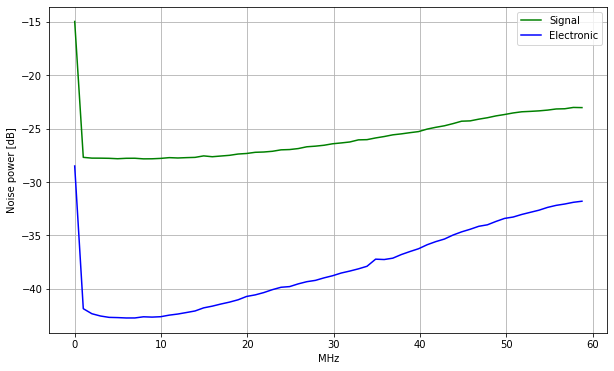

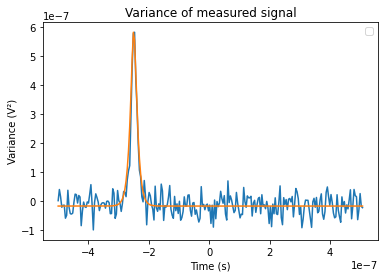

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.17933355489149824
Block 1 Input |\alpha| = 0.25495342755444955
Block 2 Input |\alpha| = 0.23504284067892464
Block 3 Input |\alpha| = 0.22242694760728812
Block 4 Input |\alpha| = 0.21529714645640805
Block 5 Input |\alpha| = 0.2026769620373596
Block 6 Input |\alpha| = 0.2019471160528192
Block 7 Input |\alpha| = 0.21892438061583927
Block 8 Input |\alpha| = 0.2911752641284881
Block 9 Input |\alpha| = 0.252670920007868
Input |\alpha| averaged through all blocks: 0.23 (0.03)
Input angle averaged through all blocks: 159.32 (6.97)°
Input |alpha| = 0.23
Relay theta = 90.00°
Input state theta = 159.32°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


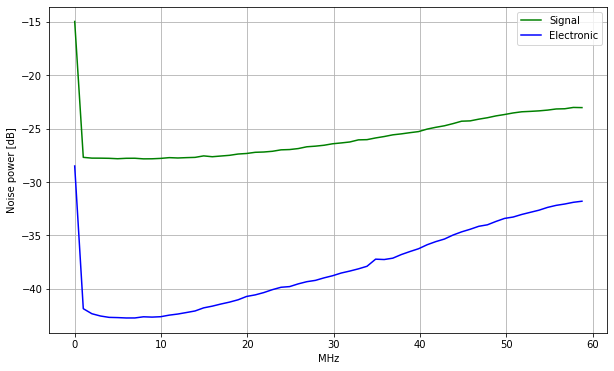

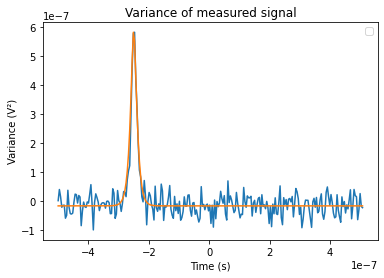

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.17510786370973608
Block 1 Input |\alpha| = 0.2510040438889931
Block 2 Input |\alpha| = 0.23017114241845216
Block 3 Input |\alpha| = 0.21778651784055966
Block 4 Input |\alpha| = 0.21250792696367016
Block 5 Input |\alpha| = 0.19682176035906007
Block 6 Input |\alpha| = 0.19722034319766793
Block 7 Input |\alpha| = 0.21524742673348715
Block 8 Input |\alpha| = 0.2867441457677736
Block 9 Input |\alpha| = 0.24765680731022374
Input |\alpha| averaged through all blocks: 0.22 (0.03)
Input angle averaged through all blocks: 159.38 (7.09)°
Input |alpha| = 0.22
Relay theta = 90.00°
Input state theta = 159.38°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


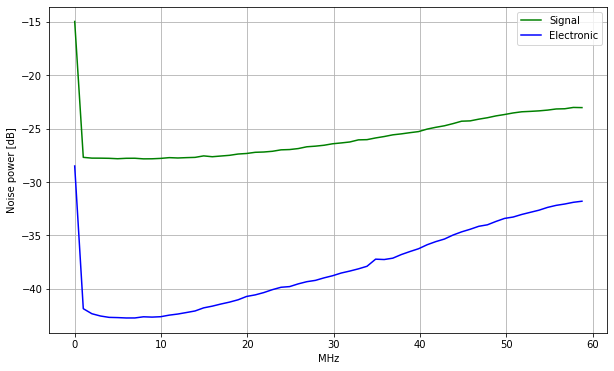

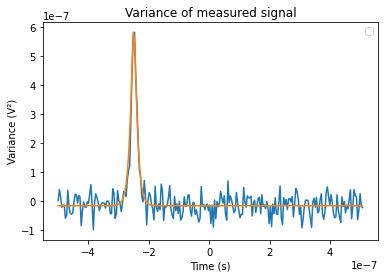

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.1716502185134915
Block 1 Input |\alpha| = 0.24786306245700065
Block 2 Input |\alpha| = 0.2260254421970296
Block 3 Input |\alpha| = 0.213926748814945
Block 4 Input |\alpha| = 0.210350144212864
Block 5 Input |\alpha| = 0.192091747534845
Block 6 Input |\alpha| = 0.1933578596007103
Block 7 Input |\alpha| = 0.21218473415754763
Block 8 Input |\alpha| = 0.28302802152405876
Block 9 Input |\alpha| = 0.24347169290478418
Input |\alpha| averaged through all blocks: 0.22 (0.03)
Input angle averaged through all blocks: 159.44 (7.20)°
Input |alpha| = 0.22
Relay theta = 90.00°
Input state theta = 159.44°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


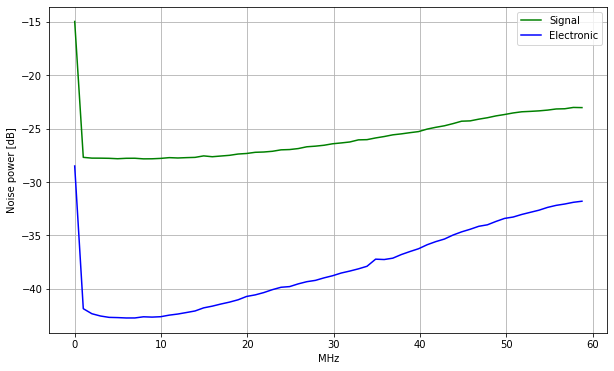

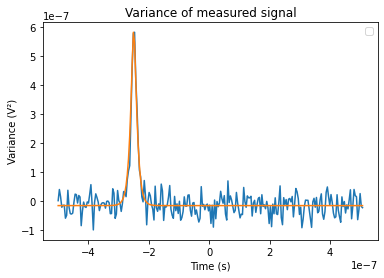

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.16877864471022364
Block 1 Input |\alpha| = 0.24532786517991104
Block 2 Input |\alpha| = 0.22245339844981654
Block 3 Input |\alpha| = 0.21066434362960115
Block 4 Input |\alpha| = 0.20864102458108907
Block 5 Input |\alpha| = 0.18821894183716348
Block 6 Input |\alpha| = 0.19015692011394
Block 7 Input |\alpha| = 0.20958844125987247
Block 8 Input |\alpha| = 0.2798749982654282
Block 9 Input |\alpha| = 0.23993679072477644
Input |\alpha| averaged through all blocks: 0.22 (0.03)
Input angle averaged through all blocks: 159.49 (7.30)°
Input |alpha| = 0.22
Relay theta = 90.00°
Input state theta = 159.49°
PLOTS FOR INPUT STATE
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.30 %
Success rate = 0.30 %

<ipython-input-7-e3aa4fff8aed>:52: ComplexWarning: Casting complex values to real discards the imaginary part
  rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v][i].input_rho, success_rate[v], n_dim, plot = False, verbose = False)


Converged
48 runs
|alpha| = 0.01
theta = 11.93°
Converged
49 runs
|alpha| = 0.01
theta = 21.64°
Converged
50 runs
|alpha| = 0.01
theta = 30.50°
Converged
52 runs
|alpha| = 0.01
theta = 33.93°
Converged
54 runs
|alpha| = 0.02
theta = 35.93°
Converged
56 runs
|alpha| = 0.02
theta = 38.54°
Converged
108 runs
|alpha| = 0.08
theta = 29.08°
Converged
107 runs
|alpha| = 0.08
theta = 30.16°
Converged
106 runs
|alpha| = 0.08
theta = 31.45°
Converged
104 runs
|alpha| = 0.08
theta = 32.76°
Converged
99 runs
|alpha| = 0.08
theta = 33.88°
Converged
102 runs
|alpha| = 0.08
theta = 34.81°
Converged
95 runs
|alpha| = 0.08
theta = 35.65°
Converged
124 runs
|alpha| = 0.07
theta = 73.19°
Converged
122 runs
|alpha| = 0.07
theta = 72.42°
Converged
115 runs
|alpha| = 0.06
theta = 71.83°
Converged
109 runs
|alpha| = 0.06
theta = 71.61°
Converged
99 runs
|alpha| = 0.06
theta = 71.25°
Converged
96 runs
|alpha| = 0.06
theta = 70.56°
Converged
94 runs
|alpha| = 0.06
theta = 63.67°


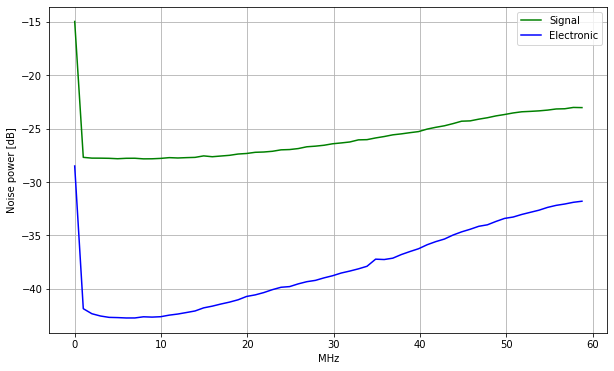

In [7]:
# Input state data
input_data_folder = "20240222/"#"input/"
#voltage_folder = '001/'#extra[extra.find('voltage') + len('voltage'): extra.find('-')]
input_extra = '1/'

input_folder = {'vac': path['vac'], '001': folder + date[v] + input_data_folder + '001/1/', '002': folder + date[v] + input_data_folder + '002/1'}

# Apply temporal mode function to a single data
#mf_homodyne, mf_vacuum, input_rho = apply_mode_function(homodyne, vacuum, input_folder = input_folder, input_plot = False)

# Mode function parameter to vary
k_med = 2*np.pi*30e6
window = 2*np.pi*10e6
points = 7
k_list = np.linspace(k_med - window, k_med + window, points)

# Apply temporal mode function to multilple data
mf_homodyne = {v: [] for v in voltages}
mf_vacuum = {v: [] for v in voltages}
input_rho = {v: [] for v in voltages}
input_data = {v: [] for v in voltages}

for v in voltages:
    for j, k in enumerate(k_list):
        homo, vac = data[v].apply_mode_function(homodyne[v], vacuum[v], homodyne_k=k)
        mf_homodyne[v].append(homo)
        mf_vacuum[v].append(vac)
        
        input_data[v].append(inputstate.inputstate(input_folder[v], n_dim, data[v].mf, input_plot = False))

        
## Coincidences
        
# SSPD time delay information
sspd_time_delay = 100e-9
window = 2e-9

# Obtain data and success rate for multiple data and varying mode function parameter
coincidence = {v: [coincidencecheck.selectdata(mf_homodyne[v][k], charlie[v], data[v].meta, window, verbose = False) for k in range(len(k_list))] for v in voltages}
sig = {v: [None for k in range(len(k_list))] for v in voltages}
success_rate = {v: [None for k in range(len(k_list))] for v in voltages}
for v in voltages:
    for k in range(len(k_list)):
        sig[v][k], success_rate[v] = coincidence[v][k].select_teleported_data()
          
# Calculate output state for multiple data and multiple time delays
runs = len(k_list)
rho = {v: np.zeros((runs, n_dim+1, n_dim+1), dtype = complex) for v in voltages}
fidelity = {v: np.zeros(runs) for v in voltages}
for v in voltages:
    for i in range(runs):
        rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v][i].input_rho, success_rate[v], n_dim, plot = False, verbose = False)

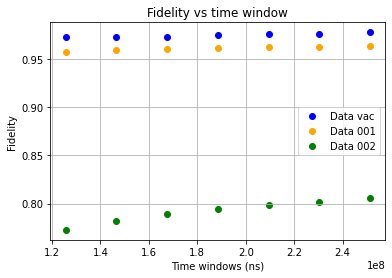

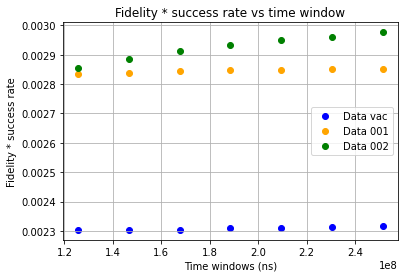

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


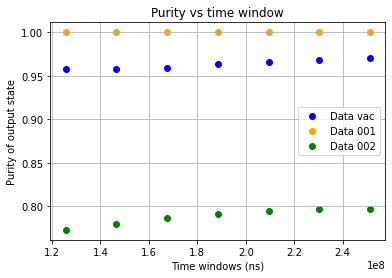

In [8]:
plot_mf_parameters(rho, input_data, fidelity, success_rate, k_list, voltages)

## Vary t

VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


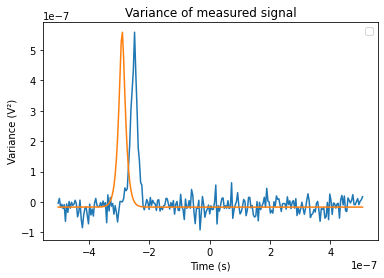

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


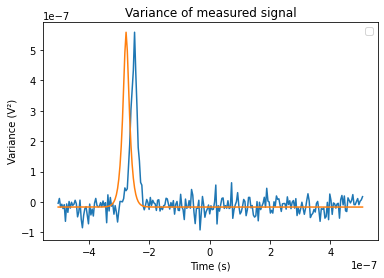

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


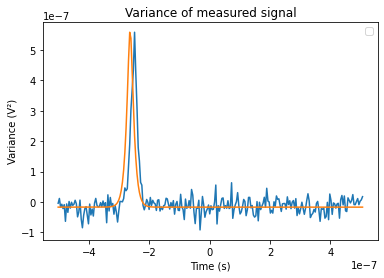

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


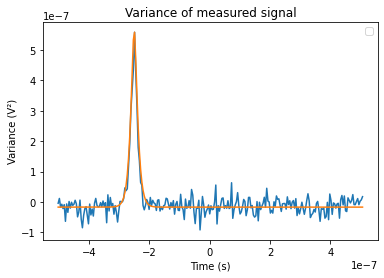

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


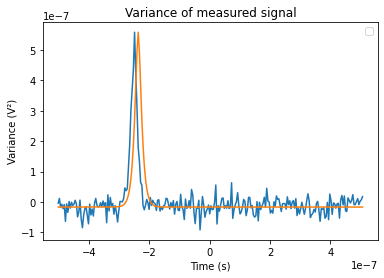

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


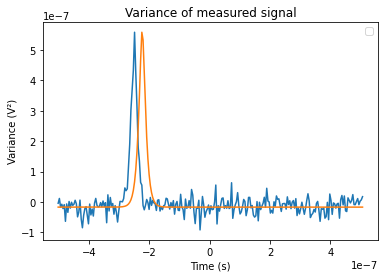

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


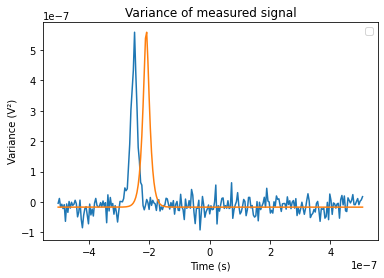

Input |alpha| = 0.00
Relay theta = 90.00°
Input state theta = 0.00°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


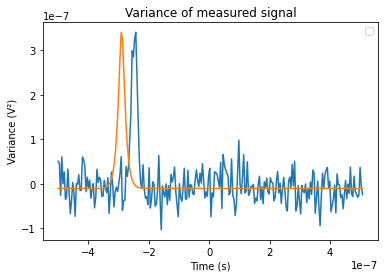

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.15865137090215156
Block 1 Input |\alpha| = 0.09723853924159456
Block 2 Input |\alpha| = 0.10614607015341962
Block 3 Input |\alpha| = 0.16056128026292915
Block 4 Input |\alpha| = 0.09157825263095418
Block 5 Input |\alpha| = 0.1111396194568597
Block 6 Input |\alpha| = 0.15793851503217973
Block 7 Input |\alpha| = 0.19285058521439288
Block 8 Input |\alpha| = 0.09391909054536317
Block 9 Input |\alpha| = 0.12157282787999343
Input |\alpha| averaged through all blocks: 0.13 (0.03)
Input angle averaged through all blocks: 75.98 (14.67)°
Input |alpha| = 0.13
Relay theta = 90.00°
Input state theta = 75.98°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


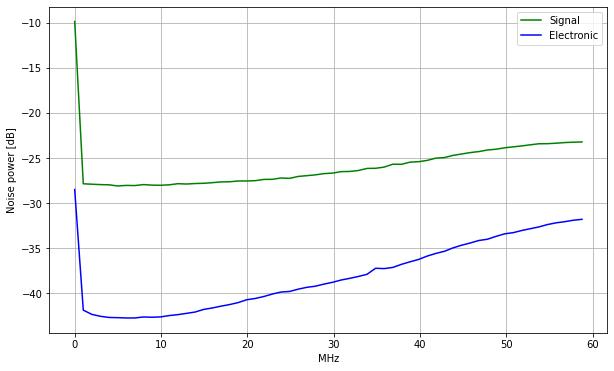

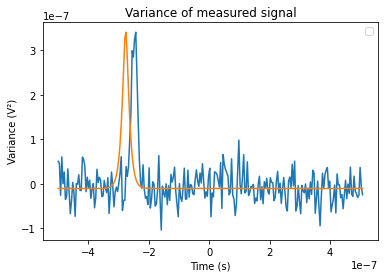

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.14270579741335718
Block 1 Input |\alpha| = 0.10056554315845666
Block 2 Input |\alpha| = 0.08299443259075515
Block 3 Input |\alpha| = 0.1626980872191607
Block 4 Input |\alpha| = 0.09313273712653015
Block 5 Input |\alpha| = 0.14511602756384845
Block 6 Input |\alpha| = 0.12157910216888412
Block 7 Input |\alpha| = 0.2082946442053334
Block 8 Input |\alpha| = 0.1291502732446361
Block 9 Input |\alpha| = 0.1575615728261002
Input |\alpha| averaged through all blocks: 0.13 (0.04)
Input angle averaged through all blocks: 78.20 (14.81)°
Input |alpha| = 0.13
Relay theta = 90.00°
Input state theta = 78.20°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


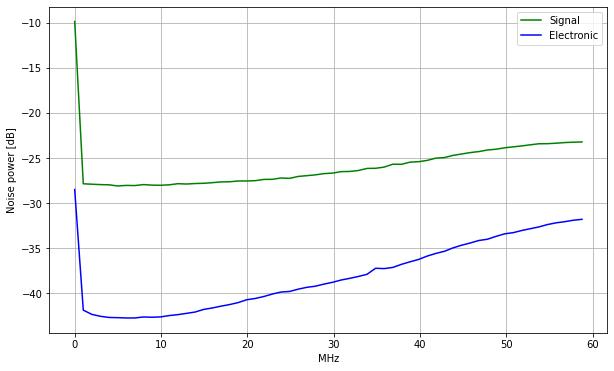

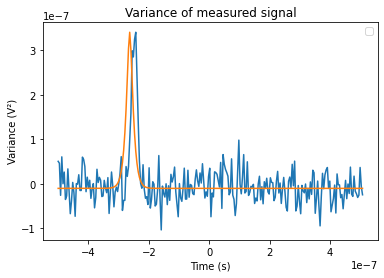

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12281135130193435
Block 1 Input |\alpha| = 0.1089087916091145
Block 2 Input |\alpha| = 0.07402850627482783
Block 3 Input |\alpha| = 0.16027543708576258
Block 4 Input |\alpha| = 0.08346533230403091
Block 5 Input |\alpha| = 0.12998369543807956
Block 6 Input |\alpha| = 0.0987931270750792
Block 7 Input |\alpha| = 0.18617586485424117
Block 8 Input |\alpha| = 0.16235527508352732
Block 9 Input |\alpha| = 0.1540293211138543
Input |\alpha| averaged through all blocks: 0.13 (0.04)
Input angle averaged through all blocks: 83.84 (12.56)°
Input |alpha| = 0.13
Relay theta = 90.00°
Input state theta = 83.84°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


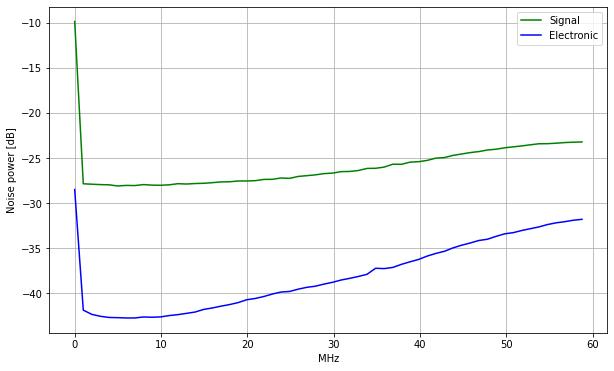

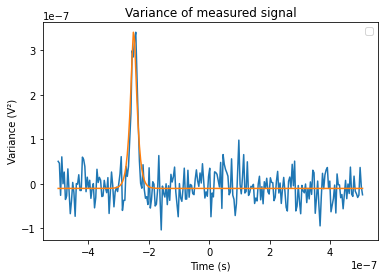

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.12459561034977018
Block 1 Input |\alpha| = 0.08728945842394126
Block 2 Input |\alpha| = 0.07279673246767603
Block 3 Input |\alpha| = 0.16860820370545543
Block 4 Input |\alpha| = 0.045000865309918855
Block 5 Input |\alpha| = 0.12754755955589653
Block 6 Input |\alpha| = 0.10245029437672991
Block 7 Input |\alpha| = 0.13927873368607893
Block 8 Input |\alpha| = 0.16342703230259087
Block 9 Input |\alpha| = 0.12285609624709849
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 87.89 (17.64)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 87.89°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


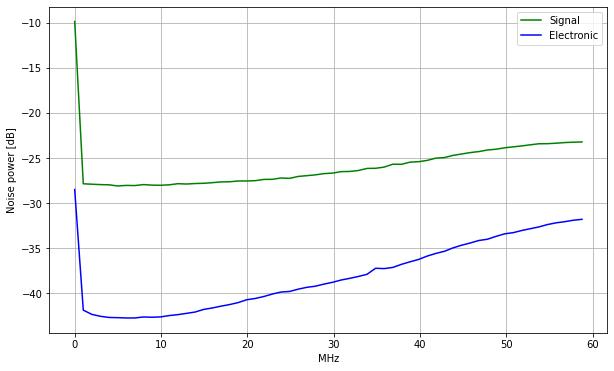

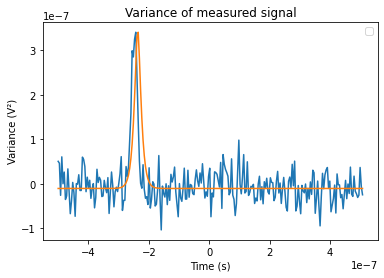

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.15871506880897374
Block 1 Input |\alpha| = 0.039746496222242814
Block 2 Input |\alpha| = 0.07839327465775875
Block 3 Input |\alpha| = 0.1560375147250936
Block 4 Input |\alpha| = 0.04530401203158693
Block 5 Input |\alpha| = 0.10656901690047135
Block 6 Input |\alpha| = 0.13967742848350137
Block 7 Input |\alpha| = 0.1403567427708689
Block 8 Input |\alpha| = 0.14473664019966467
Block 9 Input |\alpha| = 0.14649958003376942
Input |\alpha| averaged through all blocks: 0.12 (0.04)
Input angle averaged through all blocks: 91.74 (16.32)°
Input |alpha| = 0.12
Relay theta = 90.00°
Input state theta = 91.74°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


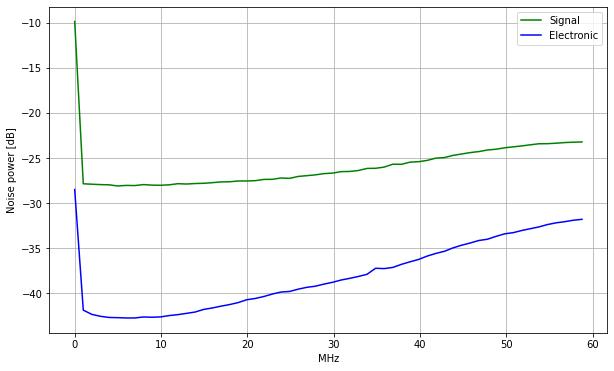

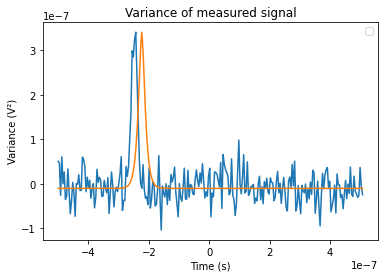

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.13511095281041735
Block 1 Input |\alpha| = 0.044783331257259286
Block 2 Input |\alpha| = 0.0783871782119867
Block 3 Input |\alpha| = 0.12315265728607697
Block 4 Input |\alpha| = 0.06539811848578468
Block 5 Input |\alpha| = 0.10659395323396945
Block 6 Input |\alpha| = 0.14086783510215428
Block 7 Input |\alpha| = 0.1260354041282081
Block 8 Input |\alpha| = 0.10489193605430172
Block 9 Input |\alpha| = 0.11851005939575303
Input |\alpha| averaged through all blocks: 0.10 (0.03)
Input angle averaged through all blocks: 97.80 (15.59)°
Input |alpha| = 0.10
Relay theta = 90.00°
Input state theta = 97.80°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


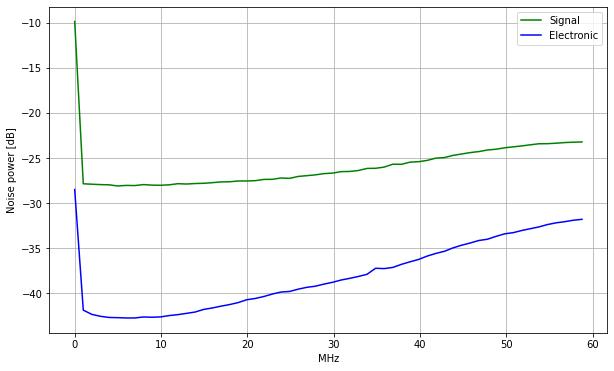

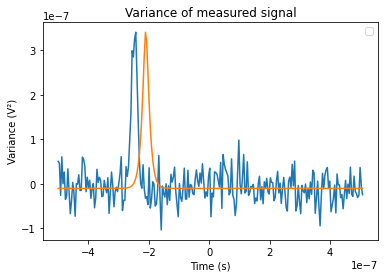

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.59 dB
0.5337 vacuum files and 0.4663 input files
0.4985 vacuum files and 0.5015 input files
Block 0 Input |\alpha| = 0.17613265799120412
Block 1 Input |\alpha| = 0.08676921310450898
Block 2 Input |\alpha| = 0.09036340696352937
Block 3 Input |\alpha| = 0.12674532249145193
Block 4 Input |\alpha| = 0.07813945322817907
Block 5 Input |\alpha| = 0.12442833025077485
Block 6 Input |\alpha| = 0.12515255890847707
Block 7 Input |\alpha| = 0.10784287963221122
Block 8 Input |\alpha| = 0.1174803185136796
Block 9 Input |\alpha| = 0.08726369666533405
Input |\alpha| averaged through all blocks: 0.11 (0.03)
Input angle averaged through all blocks: 95.11 (18.40)°
Input |alpha| = 0.11
Relay theta = 90.00°
Input state theta = 95.11°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


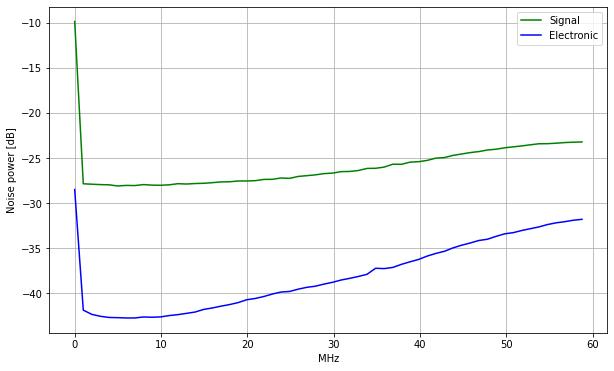

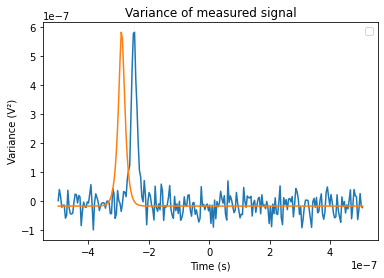

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.22730080702487937
Block 1 Input |\alpha| = 0.24961070087776482
Block 2 Input |\alpha| = 0.24825324628956086
Block 3 Input |\alpha| = 0.23619256418135012
Block 4 Input |\alpha| = 0.26357800641719076
Block 5 Input |\alpha| = 0.3056549378103868
Block 6 Input |\alpha| = 0.22981415127959132
Block 7 Input |\alpha| = 0.22867610318059337
Block 8 Input |\alpha| = 0.23192389789004336
Block 9 Input |\alpha| = 0.2417918775769948
Input |\alpha| averaged through all blocks: 0.25 (0.02)
Input angle averaged through all blocks: 157.56 (5.86)°
Input |alpha| = 0.25
Relay theta = 90.00°
Input state theta = 157.56°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


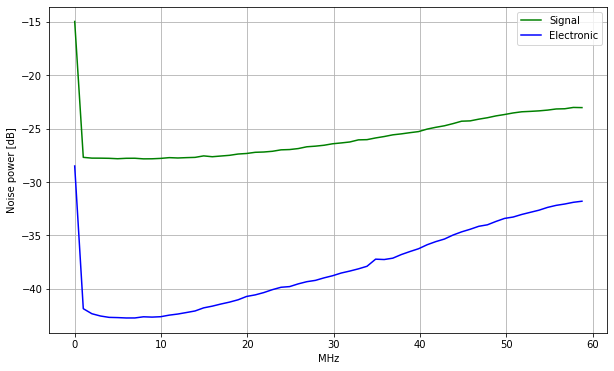

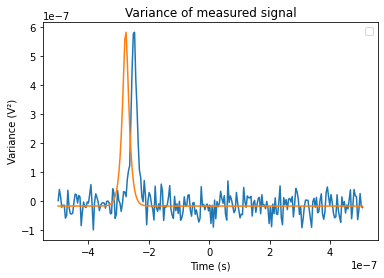

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.19708280816079132
Block 1 Input |\alpha| = 0.2567467075601282
Block 2 Input |\alpha| = 0.2321358139513857
Block 3 Input |\alpha| = 0.22593972226948864
Block 4 Input |\alpha| = 0.22685201900296675
Block 5 Input |\alpha| = 0.324197888458529
Block 6 Input |\alpha| = 0.2401291169406145
Block 7 Input |\alpha| = 0.18627836505004652
Block 8 Input |\alpha| = 0.26441168747017646
Block 9 Input |\alpha| = 0.26540509650607547
Input |\alpha| averaged through all blocks: 0.24 (0.04)
Input angle averaged through all blocks: 160.20 (6.41)°
Input |alpha| = 0.24
Relay theta = 90.00°
Input state theta = 160.20°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


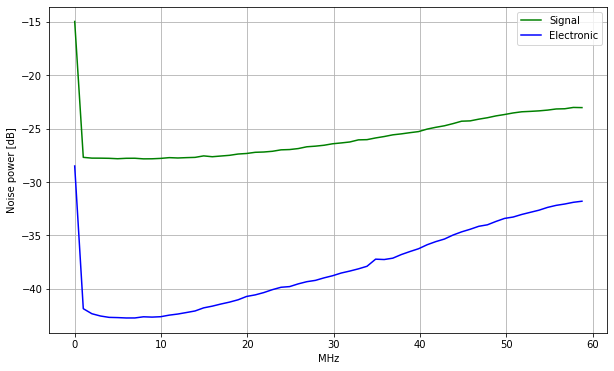

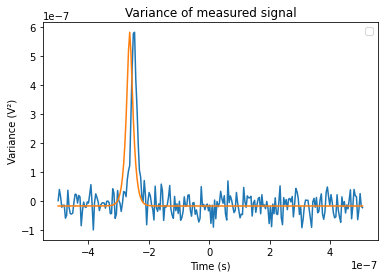

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.16464046927257217
Block 1 Input |\alpha| = 0.2580818526305057
Block 2 Input |\alpha| = 0.2641493107150613
Block 3 Input |\alpha| = 0.22607388524100322
Block 4 Input |\alpha| = 0.20332058750443574
Block 5 Input |\alpha| = 0.28384560827928296
Block 6 Input |\alpha| = 0.2278622904519862
Block 7 Input |\alpha| = 0.21177452689111628
Block 8 Input |\alpha| = 0.2989816205799812
Block 9 Input |\alpha| = 0.285259172024697
Input |\alpha| averaged through all blocks: 0.24 (0.04)
Input angle averaged through all blocks: 160.67 (6.68)°
Input |alpha| = 0.24
Relay theta = 90.00°
Input state theta = 160.67°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


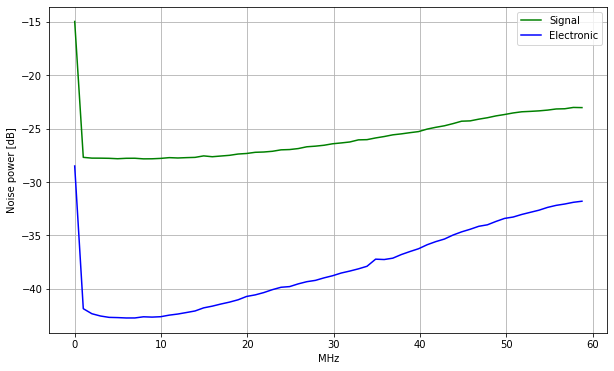

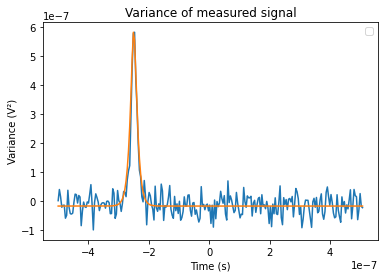

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.17933355489149824
Block 1 Input |\alpha| = 0.25495342755444955
Block 2 Input |\alpha| = 0.23504284067892464
Block 3 Input |\alpha| = 0.22242694760728812
Block 4 Input |\alpha| = 0.21529714645640805
Block 5 Input |\alpha| = 0.2026769620373596
Block 6 Input |\alpha| = 0.2019471160528192
Block 7 Input |\alpha| = 0.21892438061583927
Block 8 Input |\alpha| = 0.2911752641284881
Block 9 Input |\alpha| = 0.252670920007868
Input |\alpha| averaged through all blocks: 0.23 (0.03)
Input angle averaged through all blocks: 159.32 (6.97)°
Input |alpha| = 0.23
Relay theta = 90.00°
Input state theta = 159.32°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


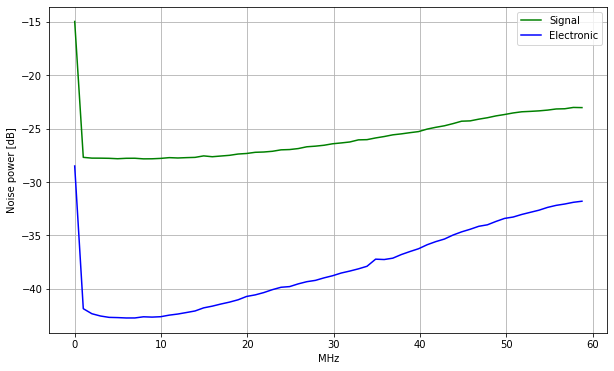

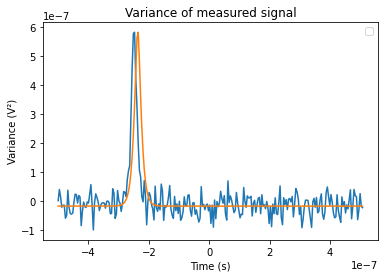

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.2466948253517624
Block 1 Input |\alpha| = 0.2676276720171048
Block 2 Input |\alpha| = 0.23038319286402978
Block 3 Input |\alpha| = 0.26301185197215504
Block 4 Input |\alpha| = 0.20479729721739315
Block 5 Input |\alpha| = 0.2190071768781264
Block 6 Input |\alpha| = 0.23971742005010027
Block 7 Input |\alpha| = 0.22397360500156244
Block 8 Input |\alpha| = 0.2777214255378968
Block 9 Input |\alpha| = 0.2514306768684913
Input |\alpha| averaged through all blocks: 0.24 (0.02)
Input angle averaged through all blocks: 156.75 (8.91)°
Input |alpha| = 0.24
Relay theta = 90.00°
Input state theta = 156.75°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


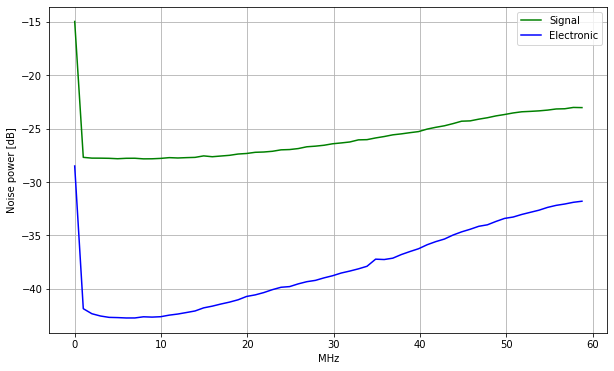

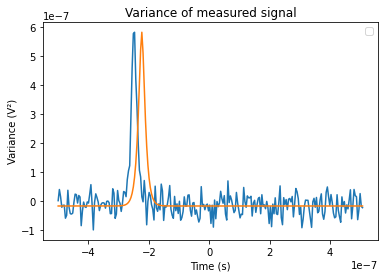

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.2454657018719465
Block 1 Input |\alpha| = 0.3066443834005204
Block 2 Input |\alpha| = 0.22864459969018372
Block 3 Input |\alpha| = 0.26839964966516144
Block 4 Input |\alpha| = 0.2400480759852716
Block 5 Input |\alpha| = 0.24988979576730438
Block 6 Input |\alpha| = 0.24820251787081482
Block 7 Input |\alpha| = 0.21776418332469555
Block 8 Input |\alpha| = 0.24098003898165846
Block 9 Input |\alpha| = 0.22427550445168615
Input |\alpha| averaged through all blocks: 0.25 (0.02)
Input angle averaged through all blocks: 156.39 (7.98)°
Input |alpha| = 0.25
Relay theta = 90.00°
Input state theta = 156.39°
PLOTS FOR INPUT STATE


VARIANCE ACROSS EACH POINT OF TELEPORTED DATA


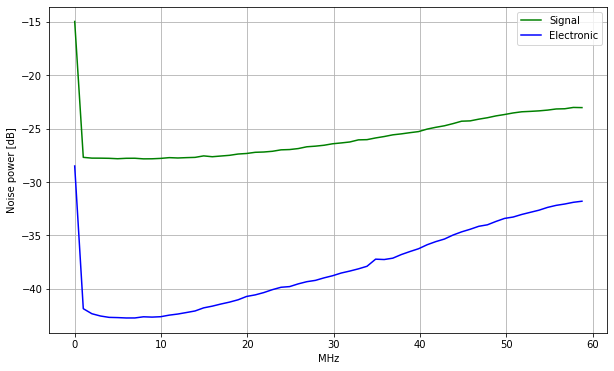

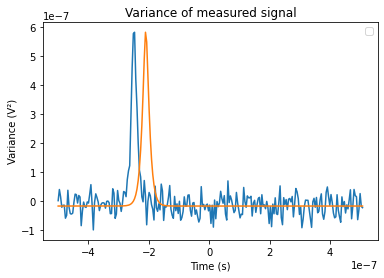

CALCULATING INPUT STATE PARAMETERS
Clearance at 10.0 MHz is 14.83 dB
0.5499 vacuum files and 0.4501 input files
0.522 vacuum files and 0.478 input files
Block 0 Input |\alpha| = 0.22329097277236726
Block 1 Input |\alpha| = 0.25921843796087196
Block 2 Input |\alpha| = 0.2451212104328565
Block 3 Input |\alpha| = 0.25574956167717317
Block 4 Input |\alpha| = 0.23023845821913883
Block 5 Input |\alpha| = 0.2156119206198201
Block 6 Input |\alpha| = 0.23184448400499102
Block 7 Input |\alpha| = 0.2585459849103058
Block 8 Input |\alpha| = 0.24456373188817346
Block 9 Input |\alpha| = 0.21079716140196286
Input |\alpha| averaged through all blocks: 0.24 (0.02)
Input angle averaged through all blocks: 154.42 (6.83)°
Input |alpha| = 0.24
Relay theta = 90.00°
Input state theta = 154.42°
PLOTS FOR INPUT STATE
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.24 %
Success rate = 0.30 %
Success rate = 0.30 

<ipython-input-5-a42d80f61044>:52: ComplexWarning: Casting complex values to real discards the imaginary part
  rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v][i].input_rho, success_rate[v], n_dim, plot = False, verbose = False)


Converged
83 runs
|alpha| = 0.04
theta = 27.16°
Converged
107 runs
|alpha| = 0.02
theta = 18.56°
Converged
50 runs
|alpha| = 0.01
theta = 30.50°
Converged
74 runs
|alpha| = 0.06
theta = -5.78°
Converged
122 runs
|alpha| = 0.06
theta = -12.26°
Converged
76 runs
|alpha| = 0.07
theta = -10.08°
Converged
143 runs
|alpha| = 0.05
theta = -76.33°
Converged
62 runs
|alpha| = 0.06
theta = 80.27°
Converged
64 runs
|alpha| = 0.06
theta = 52.52°
Converged
104 runs
|alpha| = 0.08
theta = 32.76°
Converged
94 runs
|alpha| = 0.09
theta = -7.26°
Converged
68 runs
|alpha| = 0.06
theta = -27.19°
Converged
58 runs
|alpha| = 0.05
theta = -36.01°
Converged
61 runs
|alpha| = 0.06
theta = -35.94°
Converged
122 runs
|alpha| = 0.06
theta = -64.86°
Converged
82 runs
|alpha| = 0.09
theta = -87.71°
Converged
109 runs
|alpha| = 0.06
theta = 71.61°
Converged
71 runs
|alpha| = 0.08
theta = 67.46°
Converged
53 runs
|alpha| = 0.04
theta = 69.64°
Converged
42 runs
|alpha| = 0.03
theta = 77.22°


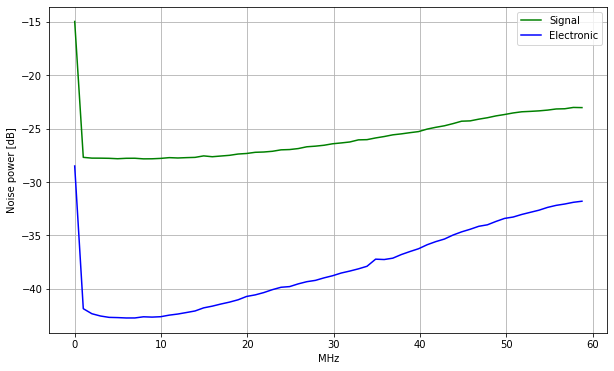

In [5]:
# Input state data
input_data_folder = "20240222/"#"input/"
#voltage_folder = '001/'#extra[extra.find('voltage') + len('voltage'): extra.find('-')]
input_extra = '1/'

input_folder = {'vac': path['vac'], '001': folder + date[v] + input_data_folder + '001/1/', '002': folder + date[v] + input_data_folder + '002/1'}

# Apply temporal mode function to a single data
#mf_homodyne, mf_vacuum, input_rho = apply_mode_function(homodyne, vacuum, input_folder = input_folder, input_plot = False)

# Mode function parameter to vary
t_med = -250e-9
window = 40e-9
points = 7
t_list = np.linspace(t_med - window, t_med + window, points)

# Apply temporal mode function to multilple data
mf_homodyne = {v: [] for v in voltages}
mf_vacuum = {v: [] for v in voltages}
input_rho = {v: [] for v in voltages}
input_data = {v: [] for v in voltages}

for v in voltages:
    for j, t in enumerate(t_list):
        homo, vac = data[v].apply_mode_function(homodyne[v], vacuum[v], homodyne_time_delay=t)
        mf_homodyne[v].append(homo)
        mf_vacuum[v].append(vac)
        
        input_data[v].append(inputstate.inputstate(input_folder[v], n_dim, data[v].mf, input_plot = False))

        
## Coincidences
        
# SSPD time delay information
sspd_time_delay = 100e-9
window = 2e-9

# Obtain data and success rate for multiple data and varying mode function parameter
coincidence = {v: [coincidencecheck.selectdata(mf_homodyne[v][t], charlie[v], data[v].meta, window, verbose = False) for t in range(len(t_list))] for v in voltages}
sig = {v: [None for t in range(len(t_list))] for v in voltages}
success_rate = {v: [None for t in range(len(t_list))] for v in voltages}
for v in voltages:
    for t in range(len(t_list)):
        sig[v][t], success_rate[v] = coincidence[v][t].select_teleported_data()
          
# Calculate output state for multiple data and multiple time delays
runs = len(t_list)
rho = {v: np.zeros((runs, n_dim+1, n_dim+1), dtype = complex) for v in voltages}
fidelity = {v: np.zeros(runs) for v in voltages}
for v in voltages:
    for i in range(runs):
        rho[v][i], fidelity[v][i] = functions.calculate_output_state(sig[v][i], input_data[v][i].input_rho, success_rate[v], n_dim, plot = False, verbose = False)

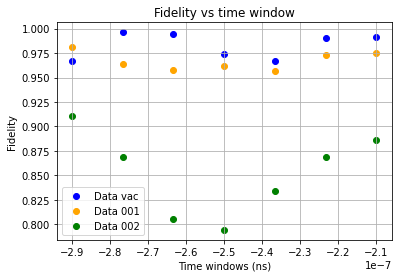

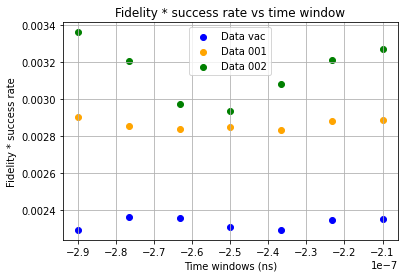

C:\Users\lunfa\AppData\Roaming\Python\Python38\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


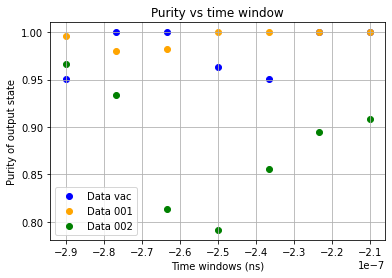

In [6]:
plot_mf_parameters(rho, input_data, fidelity, success_rate, t_list, voltages)